# Nutritional AI Chatbot - Exploratory Data Analysis (EDA)

## Overview
This notebook performs comprehensive exploratory data analysis on a nutritional dataset containing 150 food items with detailed nutritional information across 20 columns. The analysis includes production-grade data validation, quality assessments, and comprehensive visualizations.

## Dataset Description
- **Rows**: 150 food items
- **Columns**: 20 nutritional and categorical features
- **Purpose**: Support the development of a personalized nutritional AI chatbot

## Analysis Objectives
1. Understand data quality and structure
2. Identify patterns in nutritional content across food categories
3. Detect outliers and anomalies
4. Explore relationships between different nutrients
5. Validate data integrity for production use

---

## 1. Import Required Libraries

In [1]:
# Import essential libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import normaltest, shapiro, anderson
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import os
import sys
from datetime import datetime

# Configure display and warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings('ignore')

# Set up matplotlib and seaborn styling
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ All libraries imported successfully!")
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Python Version: {sys.version}")
print(f"Pandas Version: {pd.__version__}")
print(f"NumPy Version: {np.__version__}")
print(f"Matplotlib Version: {plt.matplotlib.__version__}")
print(f"Seaborn Version: {sns.__version__}")

✅ All libraries imported successfully!
Analysis Date: 2025-09-30 10:15:17
Python Version: 3.13.3 (tags/v3.13.3:6280bb5, Apr  8 2025, 14:47:33) [MSC v.1943 64 bit (AMD64)]
Pandas Version: 2.3.2
NumPy Version: 2.3.3
Matplotlib Version: 3.10.6
Seaborn Version: 0.13.2


## 2. Load and Inspect Dataset

In [2]:
# Load the nutritional dataset with error handling
def load_dataset(file_path):
    """
    Load dataset with comprehensive error handling and validation
    """
    try:
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"Dataset file not found: {file_path}")
        
        # Load CSV file
        df = pd.read_csv(file_path)
        
        # Basic validation
        if df.empty:
            raise ValueError("Dataset is empty")
        
        print(f"✅ Dataset loaded successfully from: {file_path}")
        return df
    
    except FileNotFoundError as e:
        print(f"❌ Error: {e}")
        return None
    except pd.errors.EmptyDataError:
        print("❌ Error: The CSV file is empty")
        return None
    except pd.errors.ParserError as e:
        print(f"❌ Error parsing CSV file: {e}")
        return None
    except Exception as e:
        print(f"❌ Unexpected error: {e}")
        return None

# Load the dataset
dataset_path = "data/nutritional_dataset.csv"
df = load_dataset(dataset_path)

if df is not None:
    # Display basic dataset information
    print("\n" + "="*60)
    print("DATASET BASIC INFORMATION")
    print("="*60)
    
    print(f"Dataset Shape: {df.shape}")
    print(f"Number of Rows: {df.shape[0]}")
    print(f"Number of Columns: {df.shape[1]}")
    print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")
    
    print(f"\nColumn Names:")
    for i, col in enumerate(df.columns, 1):
        print(f"{i:2d}. {col}")
else:
    print("Failed to load dataset. Please check the file path and try again.")

✅ Dataset loaded successfully from: data/nutritional_dataset.csv

DATASET BASIC INFORMATION
Dataset Shape: (118, 21)
Number of Rows: 118
Number of Columns: 21
Memory Usage: 36.24 KB

Column Names:
 1. food_name
 2. food_category
 3. calories_per_100g
 4. protein_g
 5. carbohydrates_g
 6. dietary_fiber_g
 7. total_fat_g
 8. saturated_fat_g
 9. cholesterol_mg
10. sodium_mg
11. potassium_mg
12. calcium_mg
13. iron_mg
14. vitamin_a_iu
15. vitamin_c_mg
16. vitamin_e_mg
17. folate_mcg
18. niacin_mg
19. riboflavin_mg
20. thiamine_mg
21. food_group


In [3]:
# Display first and last few rows of the dataset
if df is not None:
    print("\n" + "="*60)
    print("FIRST 5 ROWS")
    print("="*60)
    display(df.head())
    
    print("\n" + "="*60)
    print("LAST 5 ROWS")
    print("="*60)
    display(df.tail())
    
    print("\n" + "="*60)
    print("RANDOM SAMPLE (5 ROWS)")
    print("="*60)
    display(df.sample(5, random_state=42))


FIRST 5 ROWS


,food_name,food_category,calories_per_100g,protein_g,carbohydrates_g,dietary_fiber_g,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,potassium_mg,calcium_mg,iron_mg,vitamin_a_iu,vitamin_c_mg,vitamin_e_mg,folate_mcg,niacin_mg,riboflavin_mg,thiamine_mg,food_group
0,Chicken Breast,Meat,165,31.0,0.0,0.0,3.6,1.0,85,74,256,15,0.9,41,0.0,0.3,4,13.7,0.1,0.1,Protein
1,Brown Rice,Grains,111,2.6,23.0,1.8,0.9,0.2,0,5,43,10,0.4,0,0.0,0.1,4,1.5,0.0,0.1,Carbohydrate
2,Salmon,Fish,208,25.4,0.0,0.0,12.4,3.1,59,59,628,12,0.8,149,0.0,1.2,26,8.5,0.4,0.2,Protein
3,Spinach,Vegetables,23,2.9,3.6,2.2,0.4,0.1,0,79,558,99,2.7,9377,28.1,2.0,194,0.7,0.2,0.1,Vegetable
4,Banana,Fruits,89,1.1,22.8,2.6,0.3,0.1,0,1,358,5,0.3,64,8.7,0.1,20,0.7,0.1,0.0,Fruit



LAST 5 ROWS


,food_name,food_category,calories_per_100g,protein_g,carbohydrates_g,dietary_fiber_g,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,potassium_mg,calcium_mg,iron_mg,vitamin_a_iu,vitamin_c_mg,vitamin_e_mg,folate_mcg,niacin_mg,riboflavin_mg,thiamine_mg,food_group
113,Rambutan,Fruits,82,0.7,20.9,0.9,0.2,0.1,0,11,42,22,0.4,2,4.9,0.1,8,1.4,0.1,0.0,Fruit
114,Endive,Vegetables,17,1.3,3.4,3.1,0.2,0.0,0,22,314,52,0.8,1080,6.5,0.4,142,0.4,0.1,0.1,Vegetable
115,Turbot,Fish,104,17.5,0.0,0.0,3.3,1.1,62,163,246,22,0.4,0,0.0,2.3,8,3.8,0.1,0.1,Protein
116,Lychee,Fruits,66,0.8,16.5,1.3,0.4,0.1,0,1,171,5,0.3,0,71.5,0.1,14,0.6,0.1,0.0,Fruit
117,Radicchio,Vegetables,23,1.4,4.5,0.9,0.3,0.1,0,22,302,19,0.6,122,8.0,2.3,60,0.3,0.0,0.1,Vegetable



RANDOM SAMPLE (5 ROWS)


,food_name,food_category,calories_per_100g,protein_g,carbohydrates_g,dietary_fiber_g,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,potassium_mg,calcium_mg,iron_mg,vitamin_a_iu,vitamin_c_mg,vitamin_e_mg,folate_mcg,niacin_mg,riboflavin_mg,thiamine_mg,food_group
56,Kiwi,Fruits,61,1.1,14.7,3.0,0.5,0.0,0,3,312,34,0.3,87,92.7,1.5,25,0.3,0.0,0.0,Fruit
89,Elderberries,Fruits,73,0.7,18.4,7.0,0.5,0.0,0,6,280,38,1.6,600,36.0,0.7,6,0.5,0.1,0.1,Fruit
4,Banana,Fruits,89,1.1,22.8,2.6,0.3,0.1,0,1,358,5,0.3,64,8.7,0.1,20,0.7,0.1,0.0,Fruit
45,Zucchini,Vegetables,17,1.2,3.1,1.0,0.3,0.1,0,8,261,16,0.4,200,17.9,0.1,24,0.5,0.1,0.0,Vegetable
26,Cod,Fish,105,23.0,0.0,0.0,0.9,0.2,55,78,413,18,0.4,38,1.0,0.4,8,2.1,0.1,0.1,Protein


## 3. Data Quality Assessment

In [4]:
# Comprehensive data quality assessment
def assess_data_quality(df):
    """
    Perform comprehensive data quality assessment
    """
    if df is None:
        return
    
    print("="*60)
    print("DATA QUALITY ASSESSMENT")
    print("="*60)
    
    # Basic information
    print("\n1. BASIC DATA INFORMATION:")
    print(f"   Shape: {df.shape}")
    print(f"   Total Cells: {df.shape[0] * df.shape[1]:,}")
    
    # Data types
    print("\n2. DATA TYPES:")
    dtype_counts = df.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"   {dtype}: {count} columns")
    
    # Missing values analysis
    print("\n3. MISSING VALUES ANALYSIS:")
    missing_count = df.isnull().sum()
    missing_percent = (missing_count / len(df)) * 100
    
    missing_summary = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': missing_count.values,
        'Missing_Percentage': missing_percent.values
    }).sort_values('Missing_Count', ascending=False)
    
    total_missing = missing_count.sum()
    print(f"   Total Missing Values: {total_missing:,}")
    print(f"   Percentage of Missing Data: {(total_missing / (df.shape[0] * df.shape[1])) * 100:.2f}%")
    
    if total_missing > 0:
        print(f"\n   Columns with Missing Values:")
        columns_with_missing = missing_summary[missing_summary['Missing_Count'] > 0]
        for _, row in columns_with_missing.iterrows():
            print(f"   - {row['Column']}: {row['Missing_Count']} ({row['Missing_Percentage']:.1f}%)")
    else:
        print("   ✅ No missing values found!")
    
    # Duplicate records
    print("\n4. DUPLICATE ANALYSIS:")
    duplicate_count = df.duplicated().sum()
    print(f"   Duplicate Rows: {duplicate_count}")
    if duplicate_count > 0:
        print(f"   Percentage of Duplicates: {(duplicate_count / len(df)) * 100:.2f}%")
        print("   ⚠️ Warning: Duplicate records found!")
    else:
        print("   ✅ No duplicate records found!")
    
    # Unique values analysis
    print("\n5. UNIQUE VALUES ANALYSIS:")
    for col in df.columns:
        unique_count = df[col].nunique()
        unique_percent = (unique_count / len(df)) * 100
        print(f"   {col}: {unique_count} unique values ({unique_percent:.1f}%)")
    
    return missing_summary

# Perform data quality assessment
missing_summary = assess_data_quality(df)

DATA QUALITY ASSESSMENT

1. BASIC DATA INFORMATION:
   Shape: (118, 21)
   Total Cells: 2,478

2. DATA TYPES:
   float64: 11 columns
   int64: 7 columns
   object: 3 columns

3. MISSING VALUES ANALYSIS:
   Total Missing Values: 0
   Percentage of Missing Data: 0.00%
   ✅ No missing values found!

4. DUPLICATE ANALYSIS:
   Duplicate Rows: 0
   ✅ No duplicate records found!

5. UNIQUE VALUES ANALYSIS:
   food_name: 118 unique values (100.0%)
   food_category: 10 unique values (8.5%)
   calories_per_100g: 87 unique values (73.7%)
   protein_g: 65 unique values (55.1%)
   carbohydrates_g: 79 unique values (66.9%)
   dietary_fiber_g: 42 unique values (35.6%)
   total_fat_g: 40 unique values (33.9%)
   saturated_fat_g: 22 unique values (18.6%)
   cholesterol_mg: 34 unique values (28.8%)
   sodium_mg: 67 unique values (56.8%)
   potassium_mg: 101 unique values (85.6%)
   calcium_mg: 66 unique values (55.9%)
   iron_mg: 34 unique values (28.8%)
   vitamin_a_iu: 87 unique values (73.7%)
   vita

In [5]:
# Detailed dataset info and data types analysis
if df is not None:
    print("\n" + "="*60)
    print("DETAILED DATA INFORMATION")
    print("="*60)
    
    print("\nDataset Info:")
    df.info(memory_usage='deep')
    
    print(f"\nData Types Summary:")
    print(df.dtypes.to_frame().rename(columns={0: 'Data_Type'}))
    
    # Identify numerical and categorical columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    print(f"\nNumerical Columns ({len(numerical_cols)}):")
    for i, col in enumerate(numerical_cols, 1):
        print(f"{i:2d}. {col}")
    
    print(f"\nCategorical Columns ({len(categorical_cols)}):")
    for i, col in enumerate(categorical_cols, 1):
        print(f"{i:2d}. {col}")
    
    # Store for later use
    globals()['numerical_cols'] = numerical_cols
    globals()['categorical_cols'] = categorical_cols


DETAILED DATA INFORMATION

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   food_name          118 non-null    object 
 1   food_category      118 non-null    object 
 2   calories_per_100g  118 non-null    int64  
 3   protein_g          118 non-null    float64
 4   carbohydrates_g    118 non-null    float64
 5   dietary_fiber_g    118 non-null    float64
 6   total_fat_g        118 non-null    float64
 7   saturated_fat_g    118 non-null    float64
 8   cholesterol_mg     118 non-null    int64  
 9   sodium_mg          118 non-null    int64  
 10  potassium_mg       118 non-null    int64  
 11  calcium_mg         118 non-null    int64  
 12  iron_mg            118 non-null    float64
 13  vitamin_a_iu       118 non-null    int64  
 14  vitamin_c_mg       118 non-null    float64
 15  vitamin_e_mg       118 non-null 

## 4. Data Cleaning and Preprocessing

In [6]:
# Data cleaning and preprocessing
def clean_dataset(df):
    """
    Comprehensive data cleaning and preprocessing
    """
    if df is None:
        return None
    
    print("="*60)
    print("DATA CLEANING AND PREPROCESSING")
    print("="*60)
    
    # Create a copy for cleaning
    df_clean = df.copy()
    original_shape = df_clean.shape
    
    print(f"Original Dataset Shape: {original_shape}")
    
    # 1. Remove duplicates
    duplicates_before = df_clean.duplicated().sum()
    df_clean = df_clean.drop_duplicates()
    duplicates_removed = duplicates_before - df_clean.duplicated().sum()
    
    if duplicates_removed > 0:
        print(f"✅ Removed {duplicates_removed} duplicate rows")
    else:
        print("✅ No duplicate rows to remove")
    
    # 2. Handle missing values (if any)
    missing_before = df_clean.isnull().sum().sum()
    if missing_before > 0:
        print(f"⚠️ Found {missing_before} missing values")
        # Strategy: For numerical columns, fill with median; for categorical, fill with mode
        for col in df_clean.columns:
            if df_clean[col].isnull().any():
                if df_clean[col].dtype in ['int64', 'float64']:
                    df_clean[col].fillna(df_clean[col].median(), inplace=True)
                    print(f"   - Filled {col} missing values with median")
                else:
                    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
                    print(f"   - Filled {col} missing values with mode")
    else:
        print("✅ No missing values to handle")
    
    # 3. Standardize column names (remove spaces, convert to lowercase)
    original_columns = df_clean.columns.tolist()
    df_clean.columns = df_clean.columns.str.replace(' ', '_').str.lower()
    
    # 4. Data type optimization
    for col in df_clean.select_dtypes(include=['int64']).columns:
        df_clean[col] = pd.to_numeric(df_clean[col], downcast='integer')
    
    for col in df_clean.select_dtypes(include=['float64']).columns:
        df_clean[col] = pd.to_numeric(df_clean[col], downcast='float')
    
    # 5. Validate data ranges (nutritional values should be non-negative)
    numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
    negative_values_found = False
    
    for col in numerical_cols:
        if (df_clean[col] < 0).any():
            negative_count = (df_clean[col] < 0).sum()
            print(f"⚠️ Found {negative_count} negative values in {col}")
            negative_values_found = True
    
    if not negative_values_found:
        print("✅ All nutritional values are non-negative")
    
    final_shape = df_clean.shape
    print(f"Final Dataset Shape: {final_shape}")
    print(f"Rows removed: {original_shape[0] - final_shape[0]}")
    
    return df_clean

# Clean the dataset
df_clean = clean_dataset(df)

# Update column references
if df_clean is not None:
    numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
    
    print(f"\nUpdated column references:")
    print(f"Numerical columns: {len(numerical_cols)}")
    print(f"Categorical columns: {len(categorical_cols)}")

DATA CLEANING AND PREPROCESSING
Original Dataset Shape: (118, 21)
✅ No duplicate rows to remove
✅ No missing values to handle
✅ All nutritional values are non-negative
Final Dataset Shape: (118, 21)
Rows removed: 0

Updated column references:
Numerical columns: 18
Categorical columns: 3


## 5. Descriptive Statistics Analysis

In [7]:
# Comprehensive descriptive statistics analysis
if df_clean is not None:
    print("="*80)
    print("DESCRIPTIVE STATISTICS ANALYSIS")
    print("="*80)
    
    # Basic descriptive statistics
    print("\n1. BASIC DESCRIPTIVE STATISTICS:")
    desc_stats = df_clean.describe()
    display(desc_stats)
    
    # Additional statistics
    print("\n2. ADDITIONAL STATISTICS:")
    additional_stats = pd.DataFrame()
    
    for col in numerical_cols:
        stats_dict = {
            'Mean': df_clean[col].mean(),
            'Median': df_clean[col].median(),
            'Mode': df_clean[col].mode().iloc[0] if not df_clean[col].mode().empty else np.nan,
            'Standard_Deviation': df_clean[col].std(),
            'Variance': df_clean[col].var(),
            'Skewness': df_clean[col].skew(),
            'Kurtosis': df_clean[col].kurtosis(),
            'Range': df_clean[col].max() - df_clean[col].min(),
            'IQR': df_clean[col].quantile(0.75) - df_clean[col].quantile(0.25),
            'CV_%': (df_clean[col].std() / df_clean[col].mean()) * 100 if df_clean[col].mean() != 0 else np.nan
        }
        additional_stats[col] = stats_dict
    
    additional_stats = additional_stats.T
    display(additional_stats.round(3))
    
    # Identify columns with high variability
    print("\n3. VARIABILITY ANALYSIS:")
    high_cv_threshold = 100  # 100% coefficient of variation
    high_cv_cols = additional_stats[additional_stats['CV_%'] > high_cv_threshold].index.tolist()
    
    if high_cv_cols:
        print(f"Columns with high variability (CV > {high_cv_threshold}%):")
        for col in high_cv_cols:
            cv = additional_stats.loc[col, 'CV_%']
            print(f"   - {col}: {cv:.1f}%")
    else:
        print(f"No columns with extremely high variability (CV > {high_cv_threshold}%)")
    
    # Skewness interpretation
    print("\n4. SKEWNESS INTERPRETATION:")
    for col in numerical_cols:
        skew_val = additional_stats.loc[col, 'Skewness']
        if abs(skew_val) < 0.5:
            skew_interp = "approximately symmetric"
        elif abs(skew_val) < 1:
            skew_interp = "moderately skewed"
        else:
            skew_interp = "highly skewed"
        
        direction = "right" if skew_val > 0 else "left" if skew_val < 0 else "symmetric"
        print(f"   {col}: {skew_val:.3f} ({direction}, {skew_interp})")

DESCRIPTIVE STATISTICS ANALYSIS

1. BASIC DESCRIPTIVE STATISTICS:


,calories_per_100g,protein_g,carbohydrates_g,dietary_fiber_g,total_fat_g,saturated_fat_g,cholesterol_mg,sodium_mg,potassium_mg,calcium_mg,iron_mg,vitamin_a_iu,vitamin_c_mg,vitamin_e_mg,folate_mcg,niacin_mg,riboflavin_mg,thiamine_mg
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,91.186441,8.348306,8.468644,2.071186,2.975424,0.831356,25.762712,77.372881,280.508475,47.262712,1.209322,1102.042373,17.255934,0.929661,33.169492,1.760170,0.104237,0.074576
std,92.111132,10.141037,7.969147,2.326404,7.933096,3.106588,58.658169,168.949889,137.839666,62.820791,1.800806,2900.457218,25.159748,2.508287,41.576067,2.816197,0.144053,0.101431
min,11.000000,0.300000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,42.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.100000,0.000000,0.000000
25%,34.250000,1.025000,2.375000,0.000000,0.200000,0.000000,0.000000,2.250000,180.250000,13.000000,0.300000,17.000000,0.000000,0.100000,8.000000,0.300000,0.000000,0.000000
50%,61.000000,2.250000,6.850000,1.600000,0.400000,0.100000,0.000000,22.500000,260.500000,25.500000,0.600000,70.000000,7.450000,0.400000,18.000000,0.600000,0.100000,0.100000
75%,117.500000,18.325000,12.800000,3.000000,1.575000,0.300000,38.750000,73.500000,356.000000,49.000000,1.500000,526.250000,24.275000,1.000000,41.500000,1.775000,0.100000,0.100000
max,588.000000,31.000000,41.000000,12.500000,50.400002,29.700001,374.000000,1060.000000,733.000000,382.000000,13.900000,16706.000000,127.699997,25.600000,194.000000,14.200000,1.100000,0.800000



2. ADDITIONAL STATISTICS:


,Mean,Median,Mode,Standard_Deviation,Variance,Skewness,Kurtosis,Range,IQR,CV_%
calories_per_100g,91.186,61.00,25.0,92.111,8484.461,3.113,13.065,577.0,83.250,101.014
protein_g,8.348,2.25,0.7,10.141,102.841,0.994,-0.699,30.7,17.300,121.474
carbohydrates_g,8.469,6.85,0.0,7.969,63.507,1.155,1.505,41.0,10.425,94.102
dietary_fiber_g,2.071,1.60,0.0,2.326,5.412,1.680,3.553,12.5,3.000,112.322
total_fat_g,2.975,0.40,0.2,7.933,62.934,4.528,22.364,50.3,1.375,266.621
saturated_fat_g,0.831,0.10,0.0,3.107,9.651,7.476,65.382,29.7,0.300,373.677
cholesterol_mg,25.763,0.00,0.0,58.658,3440.781,3.994,19.988,374.0,38.750,227.686
sodium_mg,77.373,22.50,1.0,168.950,28544.065,4.148,19.144,1060.0,71.250,218.358
potassium_mg,280.508,260.50,302.0,137.840,18999.773,0.824,0.811,691.0,175.750,49.139
calcium_mg,47.263,25.50,6.0,62.821,3946.452,3.147,11.752,379.0,36.000,132.918



3. VARIABILITY ANALYSIS:
Columns with high variability (CV > 100%):
   - calories_per_100g: 101.0%
   - protein_g: 121.5%
   - dietary_fiber_g: 112.3%
   - total_fat_g: 266.6%
   - saturated_fat_g: 373.7%
   - cholesterol_mg: 227.7%
   - sodium_mg: 218.4%
   - calcium_mg: 132.9%
   - iron_mg: 148.9%
   - vitamin_a_iu: 263.2%
   - vitamin_c_mg: 145.8%
   - vitamin_e_mg: 269.8%
   - folate_mcg: 125.3%
   - niacin_mg: 160.0%
   - riboflavin_mg: 138.2%
   - thiamine_mg: 136.0%

4. SKEWNESS INTERPRETATION:
   calories_per_100g: 3.113 (right, highly skewed)
   protein_g: 0.994 (right, moderately skewed)
   carbohydrates_g: 1.155 (right, highly skewed)
   dietary_fiber_g: 1.680 (right, highly skewed)
   total_fat_g: 4.528 (right, highly skewed)
   saturated_fat_g: 7.476 (right, highly skewed)
   cholesterol_mg: 3.994 (right, highly skewed)
   sodium_mg: 4.148 (right, highly skewed)
   potassium_mg: 0.824 (right, moderately skewed)
   calcium_mg: 3.147 (right, highly skewed)
   iron_mg: 4.272

## 6. Missing Data Analysis and Visualization

MISSING DATA ANALYSIS
✅ No missing values found in the cleaned dataset!


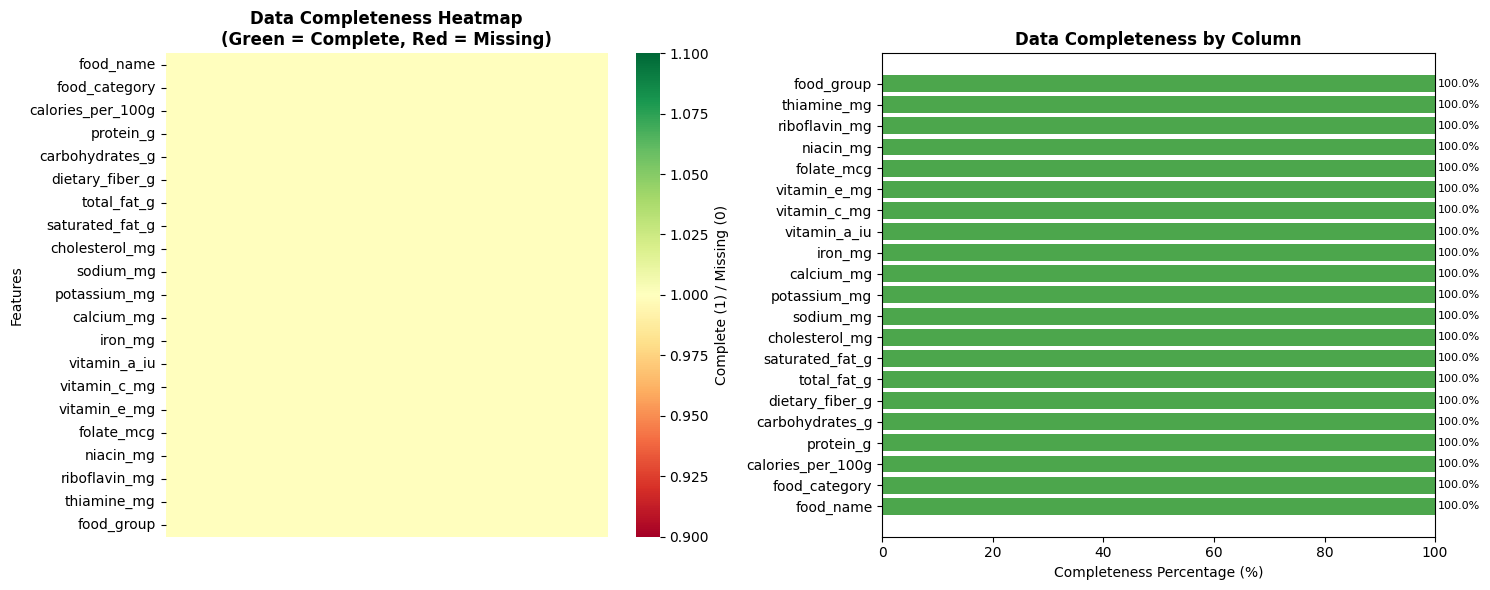

In [8]:
# Missing data analysis and visualization
if df_clean is not None:
    print("="*60)
    print("MISSING DATA ANALYSIS")
    print("="*60)
    
    # Check for missing values in cleaned dataset
    missing_data = df_clean.isnull().sum()
    missing_percent = (missing_data / len(df_clean)) * 100
    
    if missing_data.sum() == 0:
        print("✅ No missing values found in the cleaned dataset!")
        
        # Create a visualization showing completeness
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Completeness heatmap
        complete_matrix = (~df_clean.isnull()).astype(int)
        sns.heatmap(complete_matrix.T, cmap='RdYlGn', cbar_kws={'label': 'Complete (1) / Missing (0)'}, 
                   ax=ax1, xticklabels=False)
        ax1.set_title('Data Completeness Heatmap\n(Green = Complete, Red = Missing)', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Features')
        
        # Completeness percentage by column
        completeness = (1 - missing_percent/100) * 100
        bars = ax2.barh(range(len(completeness)), completeness.values, color='green', alpha=0.7)
        ax2.set_yticks(range(len(completeness)))
        ax2.set_yticklabels(completeness.index, rotation=0)
        ax2.set_xlabel('Completeness Percentage (%)')
        ax2.set_title('Data Completeness by Column', fontsize=12, fontweight='bold')
        ax2.set_xlim(0, 100)
        
        # Add percentage labels on bars
        for i, bar in enumerate(bars):
            width = bar.get_width()
            ax2.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
                    f'{width:.1f}%', ha='left', va='center', fontsize=8)
        
        plt.tight_layout()
        plt.show()
        
    else:
        print(f"⚠️ Found missing values in {missing_data.sum()} total cells")
        
        # Create missing data summary
        missing_summary = pd.DataFrame({
            'Missing_Count': missing_data,
            'Missing_Percentage': missing_percent
        }).sort_values('Missing_Count', ascending=False)
        
        # Display missing data summary
        missing_cols = missing_summary[missing_summary['Missing_Count'] > 0]
        if not missing_cols.empty:
            print("\nColumns with missing data:")
            display(missing_cols)
        
        # Visualize missing data patterns
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Missing data heatmap
        sns.heatmap(df_clean.isnull(), cmap='viridis', cbar_kws={'label': 'Missing Data'}, 
                   ax=axes[0,0], xticklabels=False)
        axes[0,0].set_title('Missing Data Heatmap', fontweight='bold')
        
        # Missing data bar chart
        missing_cols_plot = missing_summary[missing_summary['Missing_Count'] > 0]
        if not missing_cols_plot.empty:
            axes[0,1].bar(range(len(missing_cols_plot)), missing_cols_plot['Missing_Count'])
            axes[0,1].set_xticks(range(len(missing_cols_plot)))
            axes[0,1].set_xticklabels(missing_cols_plot.index, rotation=45, ha='right')
            axes[0,1].set_ylabel('Missing Count')
            axes[0,1].set_title('Missing Data Count by Column', fontweight='bold')
        
        # Missing data percentage
        if not missing_cols_plot.empty:
            axes[1,0].bar(range(len(missing_cols_plot)), missing_cols_plot['Missing_Percentage'], color='coral')
            axes[1,0].set_xticks(range(len(missing_cols_plot)))
            axes[1,0].set_xticklabels(missing_cols_plot.index, rotation=45, ha='right')
            axes[1,0].set_ylabel('Missing Percentage (%)')
            axes[1,0].set_title('Missing Data Percentage by Column', fontweight='bold')
        
        # Missing data matrix (pattern analysis)
        missing_matrix = df_clean.isnull().astype(int)
        if missing_matrix.sum().sum() > 0:
            sns.heatmap(missing_matrix.corr(), annot=True, cmap='coolwarm', center=0, 
                       ax=axes[1,1], square=True)
            axes[1,1].set_title('Missing Data Pattern Correlation', fontweight='bold')
        
        plt.tight_layout()
        plt.show()

## 7. Data Distribution Analysis

DATA DISTRIBUTION ANALYSIS


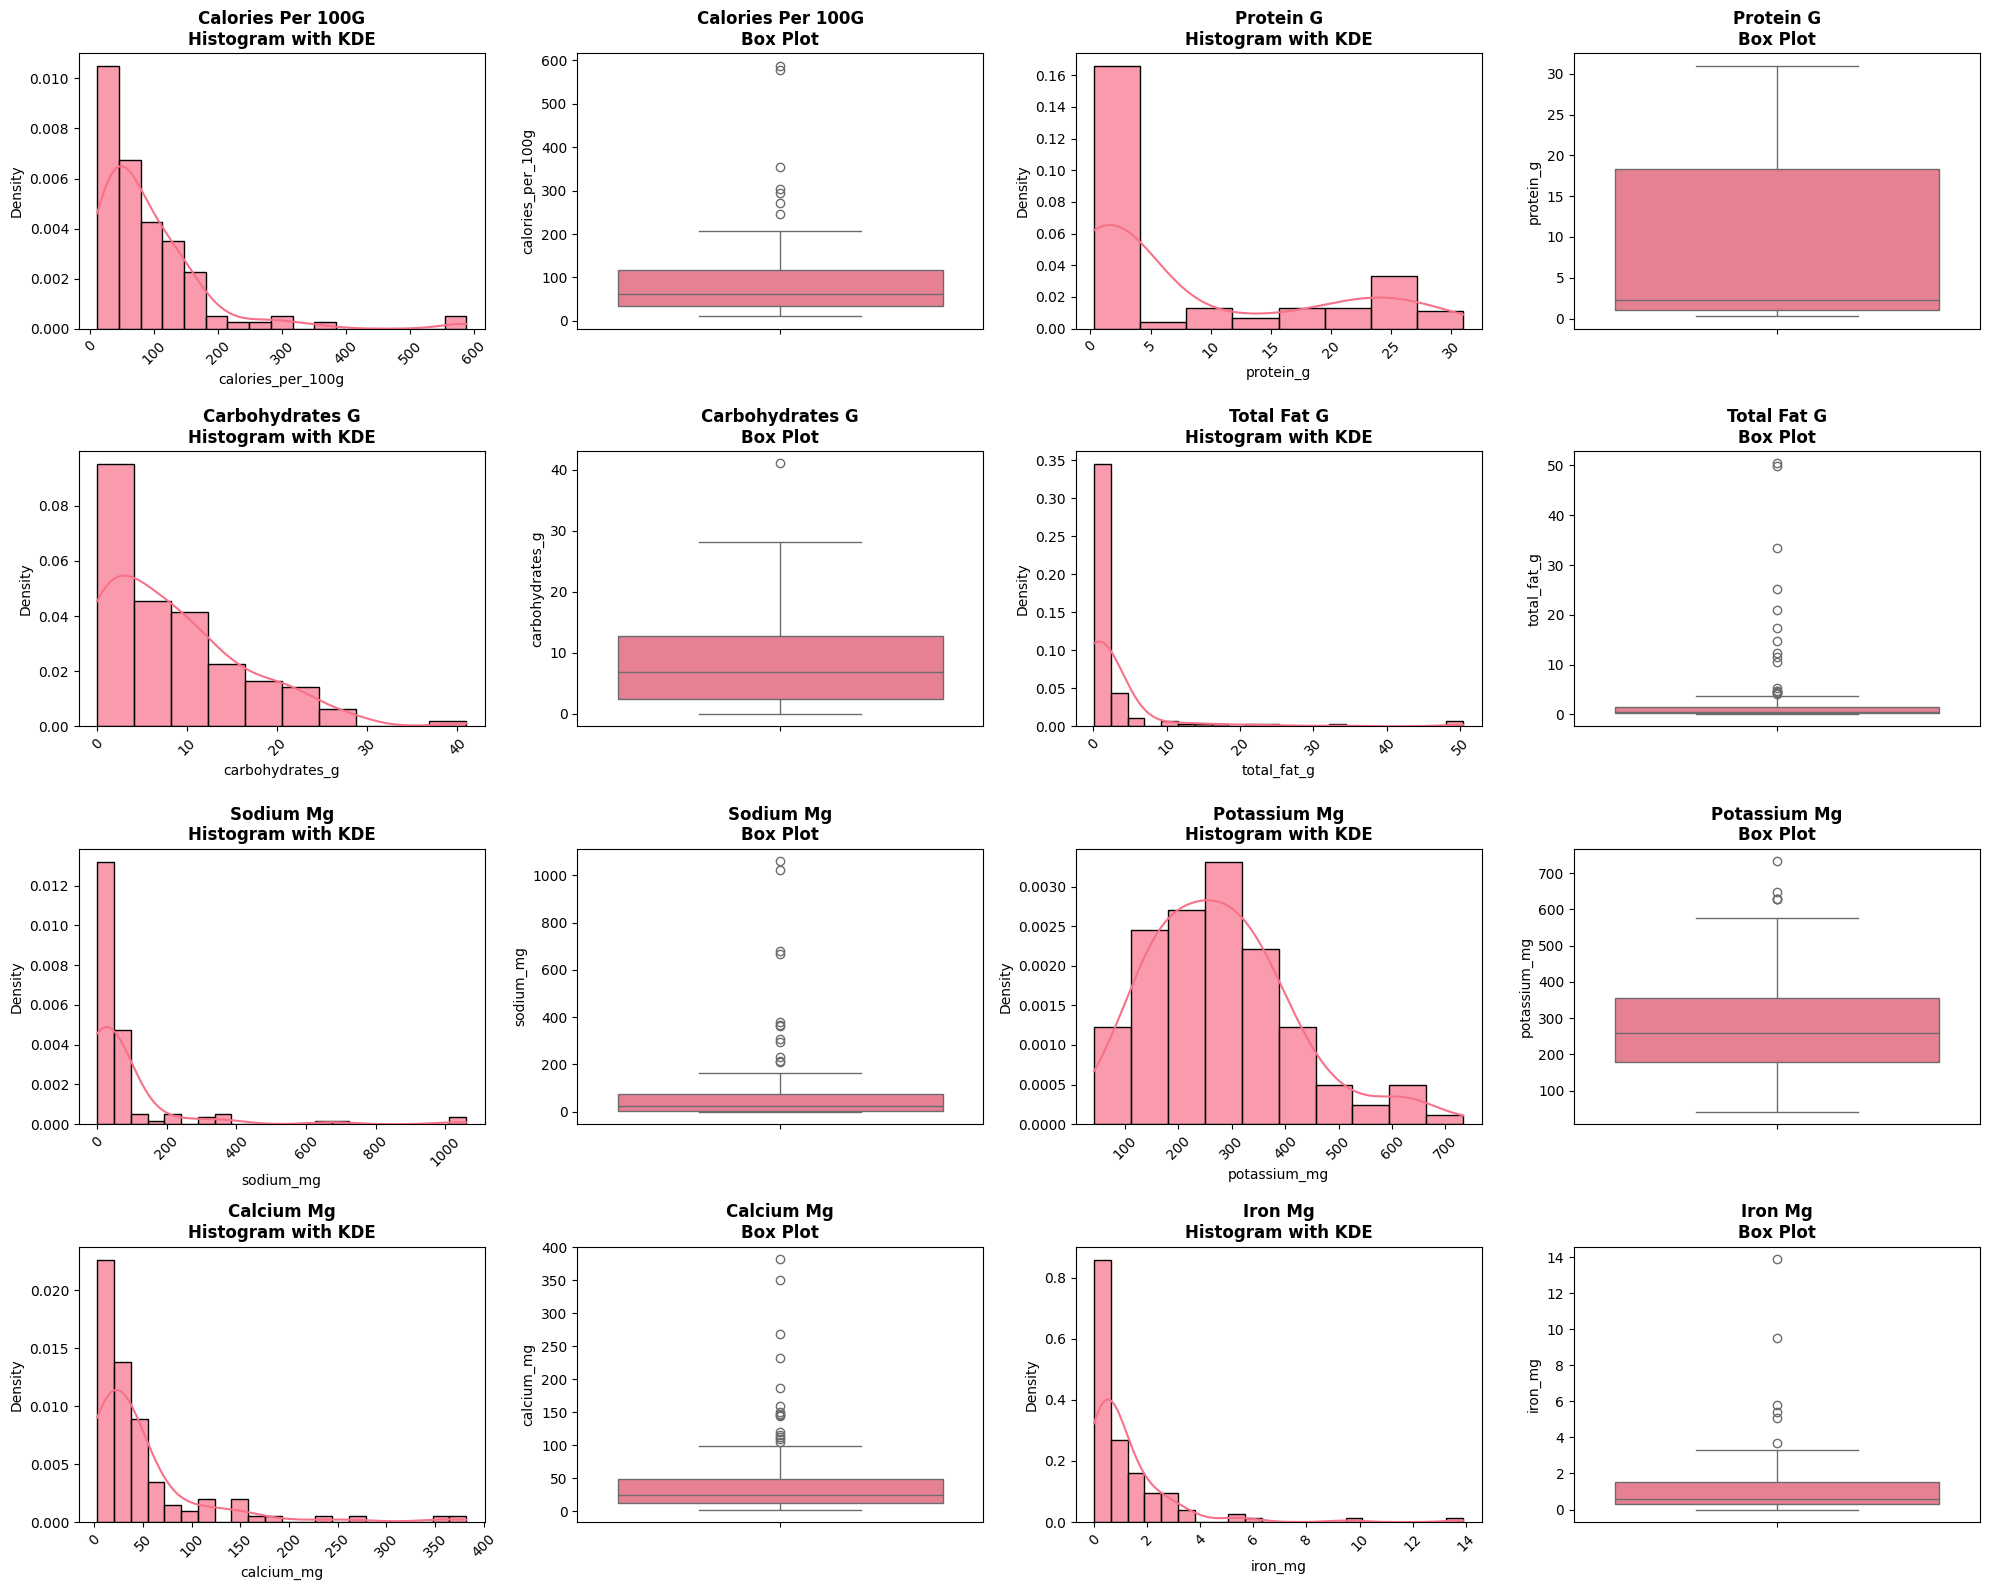


DISTRIBUTION SUMMARY:

Calories Per 100G:
   Range: 11.00 - 588.00
   Mean ± SD: 91.19 ± 92.11
   Median (IQR): 61.00 (34.25 - 117.50)
   Skewness: 3.113
   Normality: Non-normal

Protein G:
   Range: 0.30 - 31.00
   Mean ± SD: 8.35 ± 10.14
   Median (IQR): 2.25 (1.03 - 18.33)
   Skewness: 0.994
   Normality: Non-normal

Carbohydrates G:
   Range: 0.00 - 41.00
   Mean ± SD: 8.47 ± 7.97
   Median (IQR): 6.85 (2.38 - 12.80)
   Skewness: 1.155
   Normality: Non-normal

Total Fat G:
   Range: 0.10 - 50.40
   Mean ± SD: 2.98 ± 7.93
   Median (IQR): 0.40 (0.20 - 1.58)
   Skewness: 4.528
   Normality: Non-normal

Sodium Mg:
   Range: 0.00 - 1060.00
   Mean ± SD: 77.37 ± 168.95
   Median (IQR): 22.50 (2.25 - 73.50)
   Skewness: 4.148
   Normality: Non-normal

Potassium Mg:
   Range: 42.00 - 733.00
   Mean ± SD: 280.51 ± 137.84
   Median (IQR): 260.50 (180.25 - 356.00)
   Skewness: 0.824
   Normality: Non-normal

Calcium Mg:
   Range: 3.00 - 382.00
   Mean ± SD: 47.26 ± 62.82
   Median (IQR): 

In [9]:
# Distribution analysis for numerical variables
if df_clean is not None and numerical_cols:
    print("="*60)
    print("DATA DISTRIBUTION ANALYSIS")
    print("="*60)
    
    # Select key nutritional columns for detailed analysis
    key_nutrients = ['calories_per_100g', 'protein_g', 'carbohydrates_g', 'total_fat_g', 
                    'sodium_mg', 'potassium_mg', 'calcium_mg', 'iron_mg']
    
    # Filter to available columns
    available_key_nutrients = [col for col in key_nutrients if col in df_clean.columns]
    
    if not available_key_nutrients:
        available_key_nutrients = numerical_cols[:8]  # Take first 8 numerical columns
    
    # Create comprehensive distribution plots
    n_cols = 2
    n_rows = (len(available_key_nutrients) + 1) // 2
    
    fig, axes = plt.subplots(n_rows, n_cols*2, figsize=(20, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
    
    for i, col in enumerate(available_key_nutrients):
        # Histogram with KDE
        row_idx = i
        if len(axes) > i*2:
            sns.histplot(data=df_clean, x=col, kde=True, stat='density', ax=axes[i*2], alpha=0.7)
            axes[i*2].set_title(f'{col.replace("_", " ").title()}\nHistogram with KDE', fontweight='bold')
            axes[i*2].tick_params(axis='x', rotation=45)
            
            # Box plot
            if len(axes) > i*2+1:
                sns.boxplot(data=df_clean, y=col, ax=axes[i*2+1])
                axes[i*2+1].set_title(f'{col.replace("_", " ").title()}\nBox Plot', fontweight='bold')
    
    # Remove empty subplots
    for j in range(len(available_key_nutrients)*2, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
    
    # Distribution summary statistics
    print("\nDISTRIBUTION SUMMARY:")
    for col in available_key_nutrients:
        data = df_clean[col]
        
        # Normality tests
        try:
            shapiro_stat, shapiro_p = shapiro(data.sample(min(len(data), 5000), random_state=42))
            normal_test = "Normal" if shapiro_p > 0.05 else "Non-normal"
        except:
            normal_test = "Unable to test"
        
        print(f"\n{col.replace('_', ' ').title()}:")
        print(f"   Range: {data.min():.2f} - {data.max():.2f}")
        print(f"   Mean ± SD: {data.mean():.2f} ± {data.std():.2f}")
        print(f"   Median (IQR): {data.median():.2f} ({data.quantile(0.25):.2f} - {data.quantile(0.75):.2f})")
        print(f"   Skewness: {data.skew():.3f}")
        print(f"   Normality: {normal_test}")

## 8. Correlation Analysis

CORRELATION ANALYSIS


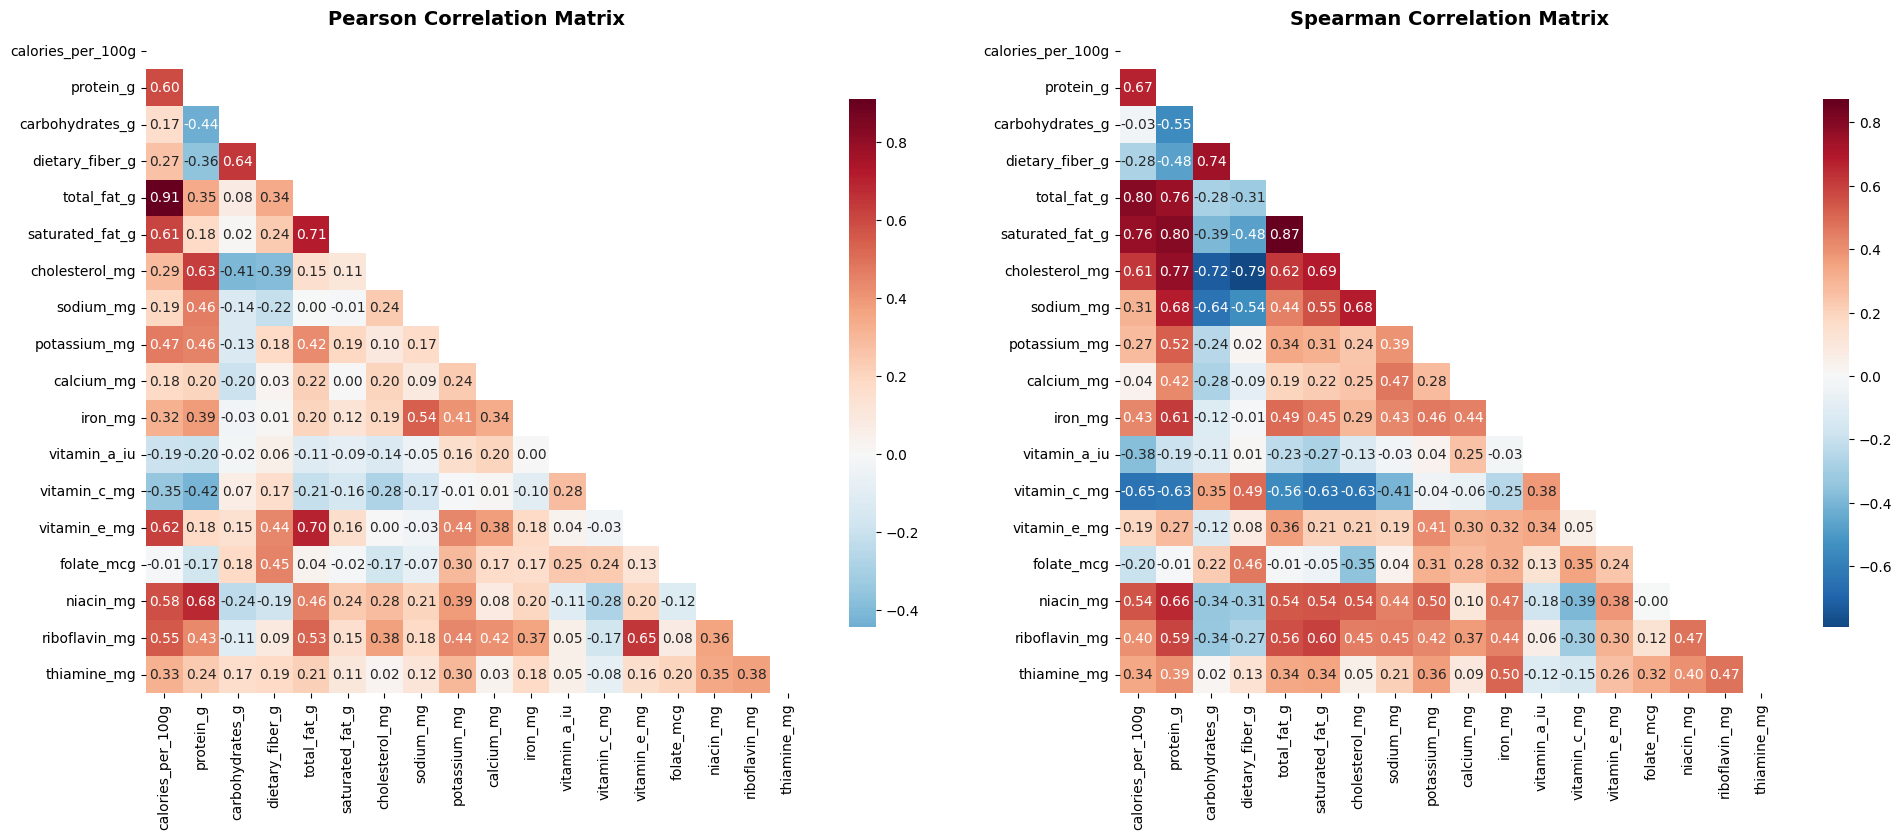


STRONG CORRELATIONS ANALYSIS:

Strong Pearson Correlations (|r| >= 0.7):
   calories_per_100g ↔ total_fat_g: 0.910 (Very Strong)
   total_fat_g ↔ saturated_fat_g: 0.710 (Strong)

Strong Spearman Correlations (|ρ| >= 0.7):
   total_fat_g ↔ saturated_fat_g: 0.874 (Strong)
   calories_per_100g ↔ total_fat_g: 0.796 (Strong)
   protein_g ↔ saturated_fat_g: 0.795 (Strong)
   dietary_fiber_g ↔ cholesterol_mg: -0.792 (Strong)
   protein_g ↔ cholesterol_mg: 0.766 (Strong)
   calories_per_100g ↔ saturated_fat_g: 0.758 (Strong)
   protein_g ↔ total_fat_g: 0.755 (Strong)
   carbohydrates_g ↔ dietary_fiber_g: 0.741 (Strong)
   carbohydrates_g ↔ cholesterol_mg: -0.720 (Strong)

CORRELATION SIGNIFICANCE TESTS:
   calories_per_100g vs total_fat_g: r = 0.910, p = 0.0000 (Significant)
   protein_g vs calories_per_100g: r = 0.596, p = 0.0000 (Significant)
   sodium_mg vs potassium_mg: r = 0.175, p = 0.0586 (Not significant)
   calcium_mg vs iron_mg: r = 0.339, p = 0.0002 (Significant)


In [10]:
# Comprehensive correlation analysis
if df_clean is not None and len(numerical_cols) > 1:
    print("="*60)
    print("CORRELATION ANALYSIS")
    print("="*60)
    
    # Calculate correlation matrices
    numerical_data = df_clean[numerical_cols]
    
    # Pearson correlation
    pearson_corr = numerical_data.corr(method='pearson')
    
    # Spearman correlation
    spearman_corr = numerical_data.corr(method='spearman')
    
    # Create correlation heatmaps
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Pearson correlation heatmap
    mask_pearson = np.triu(np.ones_like(pearson_corr, dtype=bool))
    sns.heatmap(pearson_corr, mask=mask_pearson, annot=True, cmap='RdBu_r', center=0,
                square=True, fmt='.2f', cbar_kws={'shrink': 0.8}, ax=axes[0])
    axes[0].set_title('Pearson Correlation Matrix', fontsize=14, fontweight='bold')
    
    # Spearman correlation heatmap
    mask_spearman = np.triu(np.ones_like(spearman_corr, dtype=bool))
    sns.heatmap(spearman_corr, mask=mask_spearman, annot=True, cmap='RdBu_r', center=0,
                square=True, fmt='.2f', cbar_kws={'shrink': 0.8}, ax=axes[1])
    axes[1].set_title('Spearman Correlation Matrix', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Find and display strong correlations
    print("\nSTRONG CORRELATIONS ANALYSIS:")
    
    # Extract upper triangle of correlation matrix (avoid duplicates)
    def get_correlation_pairs(corr_matrix, threshold=0.7):
        pairs = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                corr_val = corr_matrix.iloc[i, j]
                if abs(corr_val) >= threshold:
                    pairs.append({
                        'Variable_1': corr_matrix.columns[i],
                        'Variable_2': corr_matrix.columns[j],
                        'Correlation': corr_val,
                        'Strength': 'Very Strong' if abs(corr_val) >= 0.9 else 'Strong'
                    })
        return sorted(pairs, key=lambda x: abs(x['Correlation']), reverse=True)
    
    # Strong Pearson correlations
    strong_pearson = get_correlation_pairs(pearson_corr, 0.7)
    if strong_pearson:
        print(f"\nStrong Pearson Correlations (|r| >= 0.7):")
        for pair in strong_pearson:
            print(f"   {pair['Variable_1']} ↔ {pair['Variable_2']}: {pair['Correlation']:.3f} ({pair['Strength']})")
    else:
        print("\nNo strong Pearson correlations found (|r| >= 0.7)")
    
    # Strong Spearman correlations
    strong_spearman = get_correlation_pairs(spearman_corr, 0.7)
    if strong_spearman:
        print(f"\nStrong Spearman Correlations (|ρ| >= 0.7):")
        for pair in strong_spearman:
            print(f"   {pair['Variable_1']} ↔ {pair['Variable_2']}: {pair['Correlation']:.3f} ({pair['Strength']})")
    else:
        print("\nNo strong Spearman correlations found (|ρ| >= 0.7)")
    
    # Correlation significance test (for a few key pairs)
    print("\nCORRELATION SIGNIFICANCE TESTS:")
    key_pairs = [
        ('calories_per_100g', 'total_fat_g'),
        ('protein_g', 'calories_per_100g'),
        ('sodium_mg', 'potassium_mg'),
        ('calcium_mg', 'iron_mg')
    ]
    
    for var1, var2 in key_pairs:
        if var1 in numerical_data.columns and var2 in numerical_data.columns:
            try:
                corr_coeff, p_value = stats.pearsonr(numerical_data[var1], numerical_data[var2])
                significance = "Significant" if p_value < 0.05 else "Not significant"
                print(f"   {var1} vs {var2}: r = {corr_coeff:.3f}, p = {p_value:.4f} ({significance})")
            except Exception as e:
                print(f"   {var1} vs {var2}: Unable to calculate significance")

## 9. Categorical Data Analysis

CATEGORICAL DATA ANALYSIS

FOOD NAME:
   Unique Categories: 118
   Most Common: Chicken Breast (1 items, 0.8%)
   Distribution:
      Chicken Breast: 1 (0.8%)
      Brown Rice: 1 (0.8%)
      Salmon: 1 (0.8%)
      Spinach: 1 (0.8%)
      Banana: 1 (0.8%)
      Sweet Potato: 1 (0.8%)
      Almonds: 1 (0.8%)
      Greek Yogurt: 1 (0.8%)
      Avocado: 1 (0.8%)
      Quinoa: 1 (0.8%)
      Broccoli: 1 (0.8%)
      Eggs: 1 (0.8%)
      Black Beans: 1 (0.8%)
      Oats: 1 (0.8%)
      Carrots: 1 (0.8%)
      Tuna: 1 (0.8%)
      Apple: 1 (0.8%)
      Whole Wheat Bread: 1 (0.8%)
      Turkey Breast: 1 (0.8%)
      Orange: 1 (0.8%)
      Lentils: 1 (0.8%)
      Tomatoes: 1 (0.8%)
      Peanut Butter: 1 (0.8%)
      Milk: 1 (0.8%)
      Strawberries: 1 (0.8%)
      Kale: 1 (0.8%)
      Cod: 1 (0.8%)
      Blueberries: 1 (0.8%)
      Chickpeas: 1 (0.8%)
      White Rice: 1 (0.8%)
      Bell Peppers: 1 (0.8%)
      Pork Tenderloin: 1 (0.8%)
      Mango: 1 (0.8%)
      Cauliflower: 1 (0.8%)
    

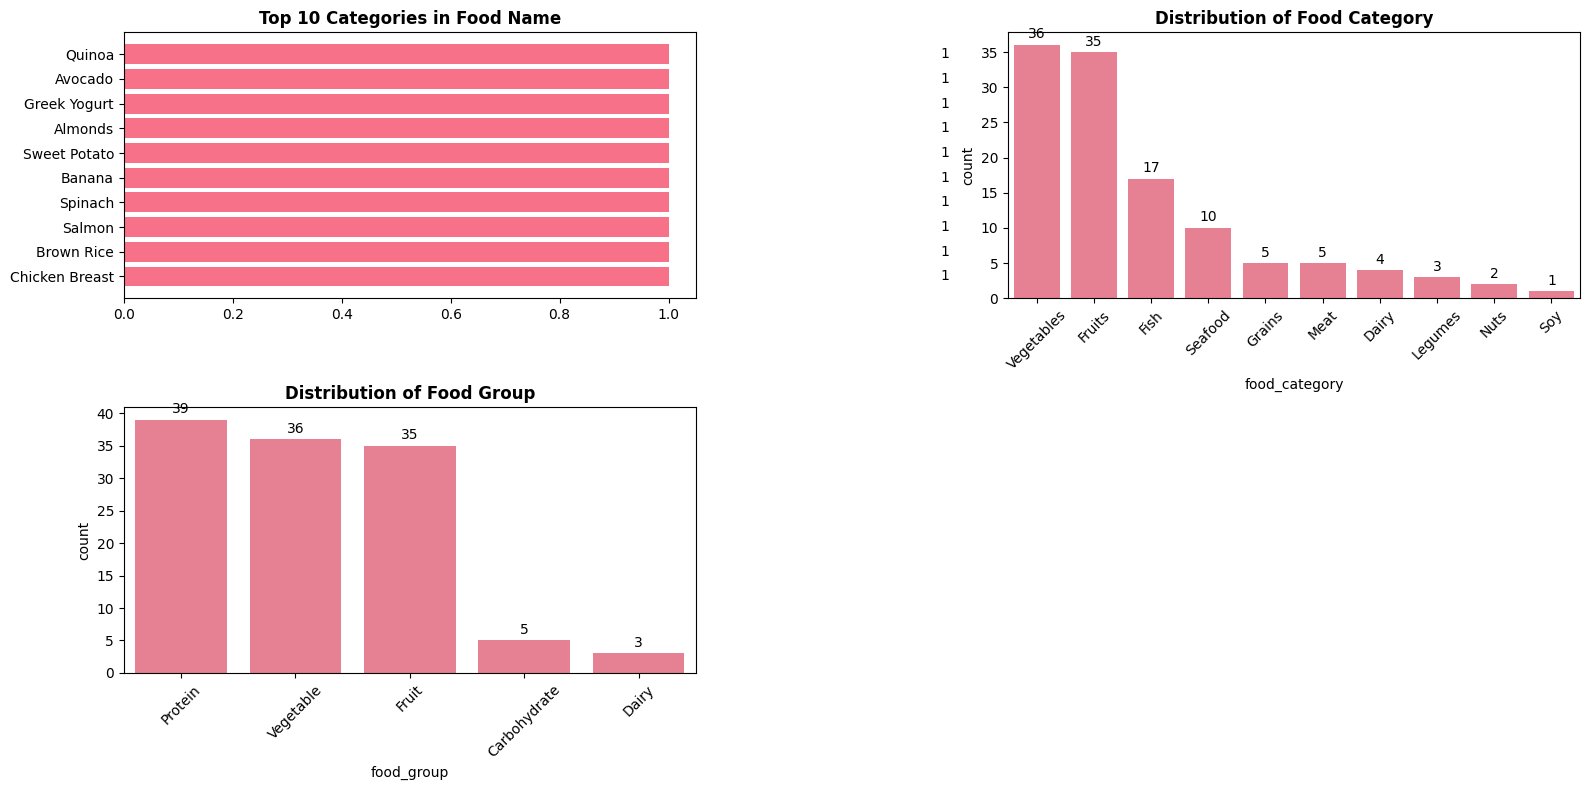


CROSS-TABULATION ANALYSIS:

Food_Name vs Food_Category:


food_category,Dairy,Fish,Fruits,Grains,Legumes,Meat,Nuts,Seafood,Soy,Vegetables,All
food_name,,,,,,,,,,,
Almonds,0,0,0,0,0,0,1,0,0,0,1
Anchovy,0,1,0,0,0,0,0,0,0,0,1
Apple,0,0,1,0,0,0,0,0,0,0,1
Apricot,0,0,1,0,0,0,0,0,0,0,1
Artichokes,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
White Rice,0,0,0,1,0,0,0,0,0,0,1
Whiting,0,1,0,0,0,0,0,0,0,0,1
Whole Wheat Bread,0,0,0,1,0,0,0,0,0,0,1


In [11]:
# Categorical data analysis
if df_clean is not None and categorical_cols:
    print("="*60)
    print("CATEGORICAL DATA ANALYSIS")
    print("="*60)
    
    # Analyze each categorical column
    for col in categorical_cols:
        print(f"\n{col.upper().replace('_', ' ')}:")
        
        # Value counts and percentages
        value_counts = df_clean[col].value_counts()
        value_percentages = df_clean[col].value_counts(normalize=True) * 100
        
        summary_df = pd.DataFrame({
            'Count': value_counts,
            'Percentage': value_percentages
        })
        
        print(f"   Unique Categories: {df_clean[col].nunique()}")
        print(f"   Most Common: {value_counts.index[0]} ({value_counts.iloc[0]} items, {value_percentages.iloc[0]:.1f}%)")
        print(f"   Distribution:")
        
        for category, count in value_counts.items():
            percentage = value_percentages[category]
            print(f"      {category}: {count} ({percentage:.1f}%)")
    
    # Create visualizations for categorical data
    n_categorical = len(categorical_cols)
    if n_categorical > 0:
        fig, axes = plt.subplots((n_categorical + 1) // 2, 2, figsize=(16, 4 * ((n_categorical + 1) // 2)))
        if n_categorical == 1:
            axes = [axes]
        elif (n_categorical + 1) // 2 == 1:
            axes = [axes]
        else:
            axes = axes.flatten()
        
        for i, col in enumerate(categorical_cols):
            if i < len(axes):
                # Count plot
                value_counts = df_clean[col].value_counts()
                
                if len(value_counts) <= 10:  # Bar plot for few categories
                    sns.countplot(data=df_clean, x=col, ax=axes[i], order=value_counts.index)
                    axes[i].set_title(f'Distribution of {col.replace("_", " ").title()}', fontweight='bold')
                    axes[i].tick_params(axis='x', rotation=45)
                    
                    # Add count labels on bars
                    for j, v in enumerate(value_counts.values):
                        axes[i].text(j, v + 0.5, str(v), ha='center', va='bottom')
                        
                else:  # Horizontal bar plot for many categories
                    top_categories = value_counts.head(10)
                    axes[i].barh(range(len(top_categories)), top_categories.values)
                    axes[i].set_yticks(range(len(top_categories)))
                    axes[i].set_yticklabels(top_categories.index)
                    axes[i].set_title(f'Top 10 Categories in {col.replace("_", " ").title()}', fontweight='bold')
                    
                    # Add count labels on bars
                    for j, v in enumerate(top_categories.values):
                        axes[i].text(v + 0.5, j, str(v), ha='left', va='center')
        
        # Remove empty subplots
        for i in range(n_categorical, len(axes)):
            fig.delaxes(axes[i])
        
        plt.tight_layout()
        plt.show()
        
        # Cross-tabulation analysis (if multiple categorical columns)
        if len(categorical_cols) >= 2:
            print(f"\nCROSS-TABULATION ANALYSIS:")
            
            # Create cross-tabulation between first two categorical columns
            col1, col2 = categorical_cols[0], categorical_cols[1]
            crosstab = pd.crosstab(df_clean[col1], df_clean[col2], margins=True)
            
            print(f"\n{col1.title()} vs {col2.title()}:")
            display(crosstab)
            
            # Visualization
            if df_clean[col1].nunique() <= 10 and df_clean[col2].nunique() <= 10:
                plt.figure(figsize=(12, 6))
                
                # Stacked bar chart
                crosstab_no_margins = pd.crosstab(df_clean[col1], df_clean[col2])
                crosstab_no_margins.plot(kind='bar', stacked=True, ax=plt.gca())
                plt.title(f'{col1.replace("_", " ").title()} by {col2.replace("_", " ").title()}', fontweight='bold')
                plt.xticks(rotation=45)
                plt.legend(title=col2.replace("_", " ").title(), bbox_to_anchor=(1.05, 1), loc='upper left')
                plt.tight_layout()
                plt.show()
                
else:
    print("No categorical columns found for analysis.")

## 10. Outlier Detection and Analysis

OUTLIER DETECTION AND ANALYSIS
OUTLIER DETECTION RESULTS:
----------------------------------------

Calories Per 100G:
   IQR Method: 7 outliers (5.9%)
   Z-Score Method: 2 outliers (1.7%)
   IQR Bounds: [-90.62, 242.38]
   IQR Outlier Values: [np.int16(247), np.int16(271), np.int16(294), np.int16(305), np.int16(354)]...

Protein G:
   IQR Method: 0 outliers (0.0%)
   Z-Score Method: 0 outliers (0.0%)
   IQR Bounds: [-24.93, 44.28]

Carbohydrates G:
   IQR Method: 1 outliers (0.8%)
   Z-Score Method: 1 outliers (0.8%)
   IQR Bounds: [-13.26, 28.44]
   IQR Outlier Values: [np.float32(41.0)]

Total Fat G:
   IQR Method: 17 outliers (14.4%)
   Z-Score Method: 3 outliers (2.5%)
   IQR Bounds: [-1.86, 3.64]
   IQR Outlier Values: [np.float32(4.0), np.float32(4.3), np.float32(4.5), np.float32(4.6), np.float32(4.8)]...

Sodium Mg:
   IQR Method: 12 outliers (10.2%)
   Z-Score Method: 4 outliers (3.4%)
   IQR Bounds: [-104.62, 180.38]
   IQR Outlier Values: [np.int16(211), np.int16(213), np.in

,Column,IQR_Outliers,IQR_Percentage,ZScore_Outliers,ZScore_Percentage,Lower_Bound_IQR,Upper_Bound_IQR
0,calories_per_100g,7,5.93,2,1.69,-90.62,242.38
1,protein_g,0,0.00,0,0.00,-24.93,44.28
2,carbohydrates_g,1,0.85,1,0.85,-13.26,28.44
3,total_fat_g,17,14.41,3,2.54,-1.86,3.64
4,sodium_mg,12,10.17,4,3.39,-104.62,180.38
5,calcium_mg,15,12.71,3,2.54,-41.00,103.00
6,iron_mg,6,5.08,2,1.69,-1.50,3.30
7,vitamin_c_mg,9,7.63,3,2.54,-36.41,60.69


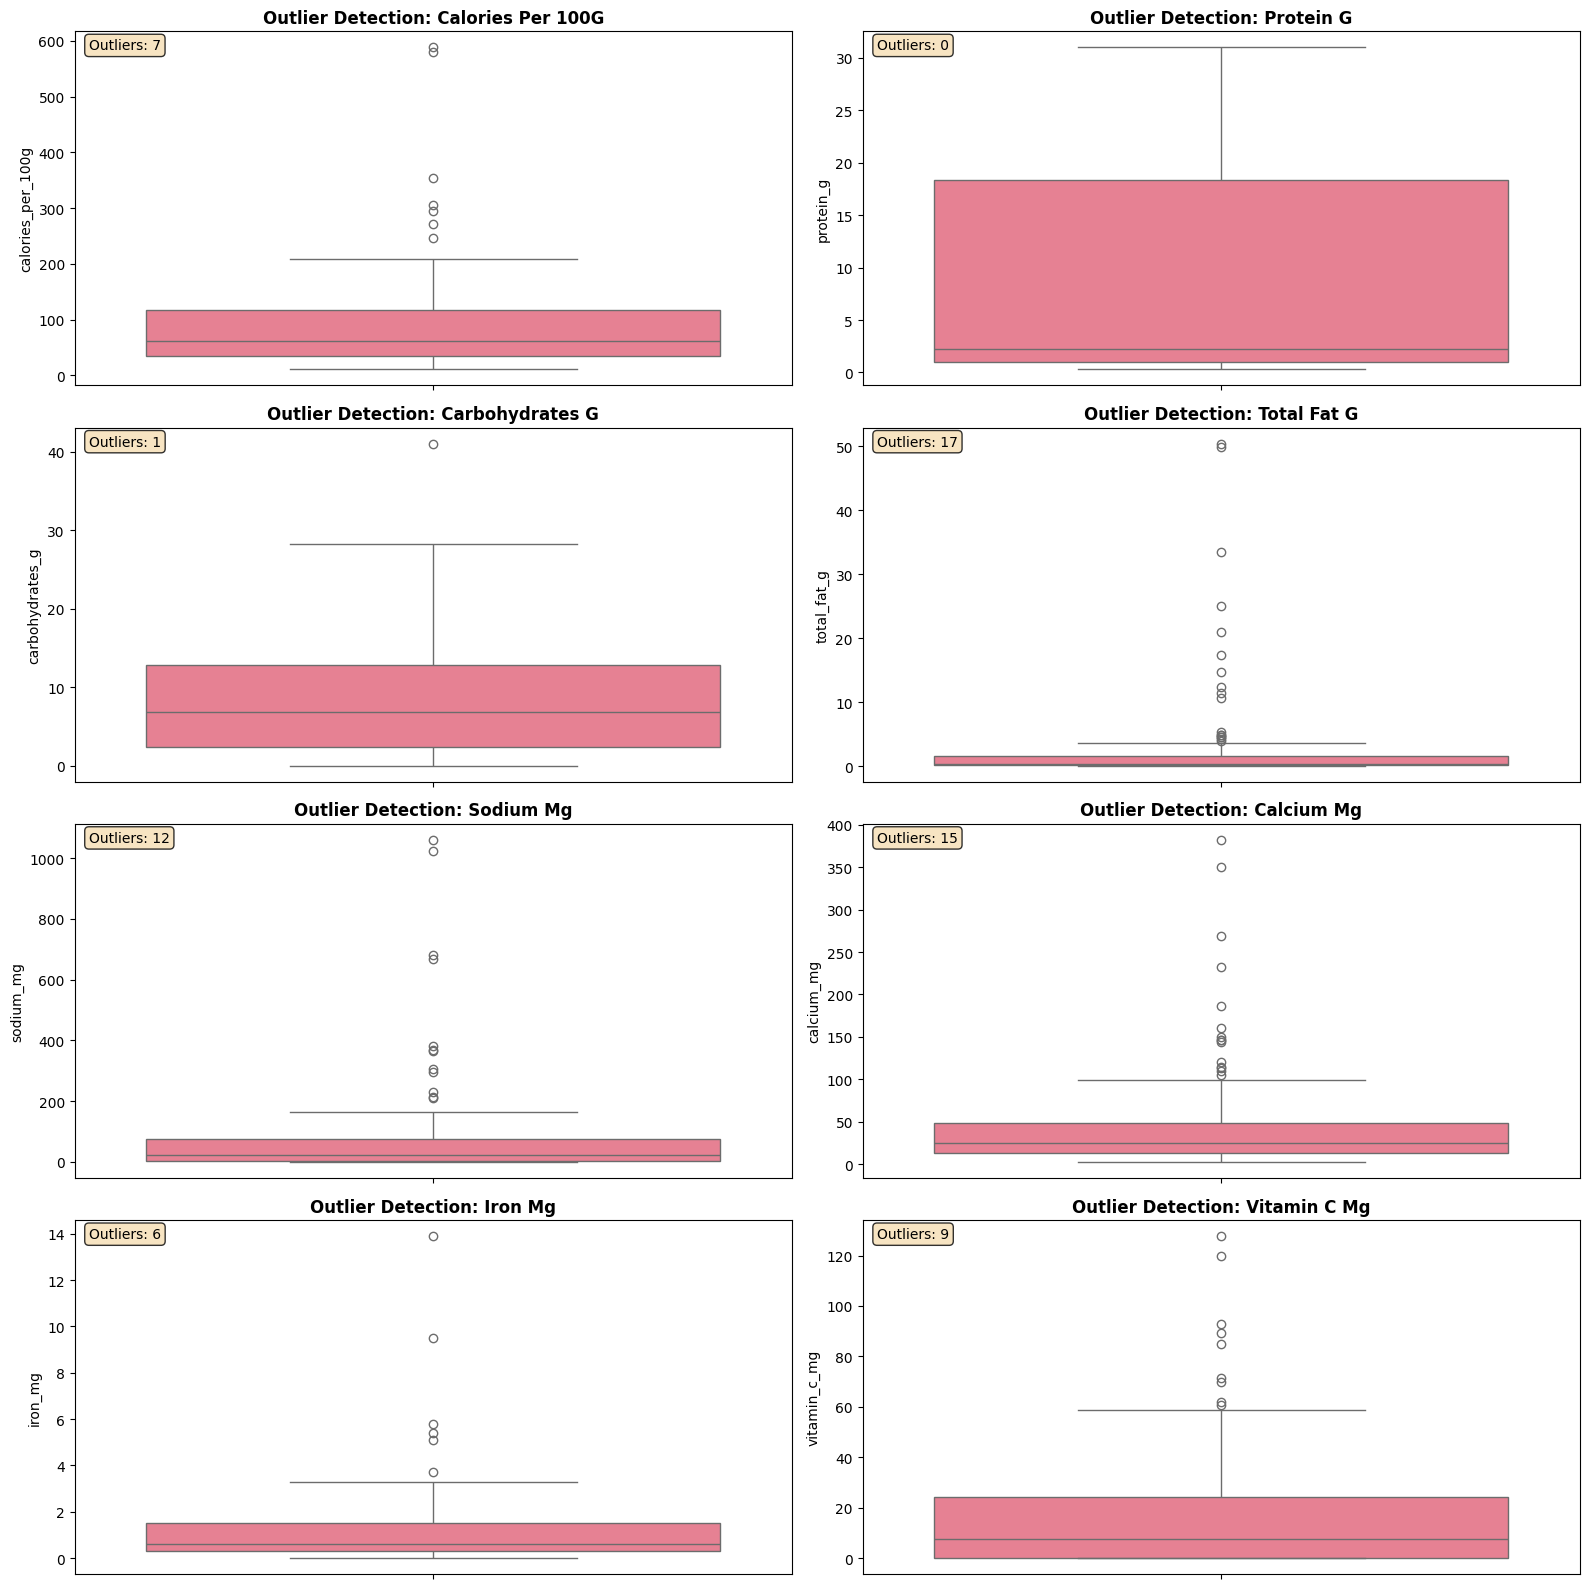


MULTIVARIATE OUTLIER DETECTION (Isolation Forest):
   Multivariate Outliers: 12 (10.2%)

   Example Outlier Records:


,food_name,calories_per_100g,protein_g,carbohydrates_g,dietary_fiber_g,total_fat_g
6,Almonds,579,21.200001,21.6,12.5,49.900002
11,Eggs,155,13.000000,1.1,0.0,10.600000
17,Whole Wheat Bread,247,13.000000,41.0,7.0,4.000000
22,Peanut Butter,588,25.100000,20.0,6.0,50.400002
25,Kale,35,2.900000,7.3,3.6,0.400000



OUTLIER IMPACT ANALYSIS:

   Calories Per 100G:
      With outliers - Mean: 91.19, Std: 92.11
      Without outliers - Mean: 73.17, Std: 48.56
      Impact - Mean change: -19.8%, Std change: -47.3%

   Carbohydrates G:
      With outliers - Mean: 8.47, Std: 7.97
      Without outliers - Mean: 8.19, Std: 7.41
      Impact - Mean change: -3.3%, Std change: -7.1%


In [12]:
# Comprehensive outlier detection and analysis
if df_clean is not None and numerical_cols:
    print("="*60)
    print("OUTLIER DETECTION AND ANALYSIS")
    print("="*60)
    
    # Define outlier detection methods
    def detect_outliers_iqr(data):
        """Detect outliers using Interquartile Range method"""
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        return outliers, lower_bound, upper_bound
    
    def detect_outliers_zscore(data, threshold=3):
        """Detect outliers using Z-score method"""
        z_scores = np.abs(stats.zscore(data))
        outliers = data[z_scores > threshold]
        return outliers, threshold
    
    # Analyze outliers for key nutritional columns
    key_nutrients = ['calories_per_100g', 'protein_g', 'carbohydrates_g', 'total_fat_g', 
                    'sodium_mg', 'calcium_mg', 'iron_mg', 'vitamin_c_mg']
    
    # Filter to available columns
    available_nutrients = [col for col in key_nutrients if col in df_clean.columns]
    if not available_nutrients:
        available_nutrients = numerical_cols[:8]
    
    outlier_summary = []
    
    print("OUTLIER DETECTION RESULTS:")
    print("-" * 40)
    
    for col in available_nutrients:
        data = df_clean[col]
        
        # IQR method
        iqr_outliers, lower_bound, upper_bound = detect_outliers_iqr(data)
        
        # Z-score method
        zscore_outliers, z_threshold = detect_outliers_zscore(data)
        
        # Store results
        outlier_info = {
            'Column': col,
            'IQR_Outliers': len(iqr_outliers),
            'IQR_Percentage': (len(iqr_outliers) / len(data)) * 100,
            'ZScore_Outliers': len(zscore_outliers),
            'ZScore_Percentage': (len(zscore_outliers) / len(data)) * 100,
            'Lower_Bound_IQR': lower_bound,
            'Upper_Bound_IQR': upper_bound
        }
        outlier_summary.append(outlier_info)
        
        print(f"\n{col.replace('_', ' ').title()}:")
        print(f"   IQR Method: {len(iqr_outliers)} outliers ({outlier_info['IQR_Percentage']:.1f}%)")
        print(f"   Z-Score Method: {len(zscore_outliers)} outliers ({outlier_info['ZScore_Percentage']:.1f}%)")
        print(f"   IQR Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
        
        if len(iqr_outliers) > 0:
            print(f"   IQR Outlier Values: {sorted(iqr_outliers.values)[:5]}{'...' if len(iqr_outliers) > 5 else ''}")
    
    # Create outlier summary DataFrame
    outlier_df = pd.DataFrame(outlier_summary)
    
    print(f"\nOUTLIER SUMMARY TABLE:")
    display(outlier_df.round(2))
    
    # Visualize outliers using box plots and scatter plots
    n_cols = 2
    n_rows = (len(available_nutrients) + 1) // 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(available_nutrients):
        if i < len(axes):
            # Box plot with outliers highlighted
            sns.boxplot(data=df_clean, y=col, ax=axes[i])
            axes[i].set_title(f'Outlier Detection: {col.replace("_", " ").title()}', fontweight='bold')
            
            # Add outlier information
            iqr_outliers, lower_bound, upper_bound = detect_outliers_iqr(df_clean[col])
            outlier_count = len(iqr_outliers)
            axes[i].text(0.02, 0.98, f'Outliers: {outlier_count}', transform=axes[i].transAxes, 
                        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # Remove empty subplots
    for i in range(len(available_nutrients), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()
    
    # Isolation Forest for multivariate outlier detection
    print(f"\nMULTIVARIATE OUTLIER DETECTION (Isolation Forest):")
    
    try:
        # Prepare data for Isolation Forest
        numerical_data = df_clean[numerical_cols].fillna(df_clean[numerical_cols].median())
        
        # Apply Isolation Forest
        iso_forest = IsolationForest(contamination=0.1, random_state=42)
        outlier_labels = iso_forest.fit_predict(numerical_data)
        
        # Count outliers
        n_outliers = (outlier_labels == -1).sum()
        outlier_percentage = (n_outliers / len(df_clean)) * 100
        
        print(f"   Multivariate Outliers: {n_outliers} ({outlier_percentage:.1f}%)")
        
        # Add outlier labels to dataframe for analysis
        df_clean['Isolation_Forest_Outlier'] = outlier_labels == -1
        
        # Show some outlier examples
        if n_outliers > 0:
            print(f"\n   Example Outlier Records:")
            outlier_records = df_clean[df_clean['Isolation_Forest_Outlier'] == True]
            display(outlier_records[['food_name'] + numerical_cols[:5]].head())
        
    except Exception as e:
        print(f"   Error in multivariate outlier detection: {e}")
    
    # Outlier impact analysis
    print(f"\nOUTLIER IMPACT ANALYSIS:")
    
    for col in available_nutrients[:3]:  # Analyze top 3 nutrients
        data_with_outliers = df_clean[col]
        iqr_outliers, _, _ = detect_outliers_iqr(data_with_outliers)
        
        if len(iqr_outliers) > 0:
            data_without_outliers = data_with_outliers[~data_with_outliers.isin(iqr_outliers)]
            
            print(f"\n   {col.replace('_', ' ').title()}:")
            print(f"      With outliers - Mean: {data_with_outliers.mean():.2f}, Std: {data_with_outliers.std():.2f}")
            print(f"      Without outliers - Mean: {data_without_outliers.mean():.2f}, Std: {data_without_outliers.std():.2f}")
            
            mean_change = ((data_without_outliers.mean() - data_with_outliers.mean()) / data_with_outliers.mean()) * 100
            std_change = ((data_without_outliers.std() - data_with_outliers.std()) / data_with_outliers.std()) * 100
            
            print(f"      Impact - Mean change: {mean_change:.1f}%, Std change: {std_change:.1f}%")

## 11. Feature Relationships and Comparisons

FEATURE RELATIONSHIPS AND COMPARISONS

NUTRITIONAL ANALYSIS BY FOOD_CATEGORY:

Mean Nutritional Values by Category:


,calories_per_100g,protein_g,carbohydrates_g,total_fat_g
food_category,,,,
Dairy,93.25,9.320000,3.220000,4.650000
Fish,137.06,22.639999,0.000000,4.440000
Fruits,68.09,1.010000,13.680000,1.830000
Grains,135.20,5.020000,25.100000,1.700000
Legumes,137.33,8.930000,23.730000,1.170000
Meat,201.60,27.920000,0.000000,9.280000
Nuts,583.50,23.150000,20.799999,50.150002
Seafood,122.70,21.820000,3.210000,2.010000
Soy,76.00,8.100000,1.900000,4.800000


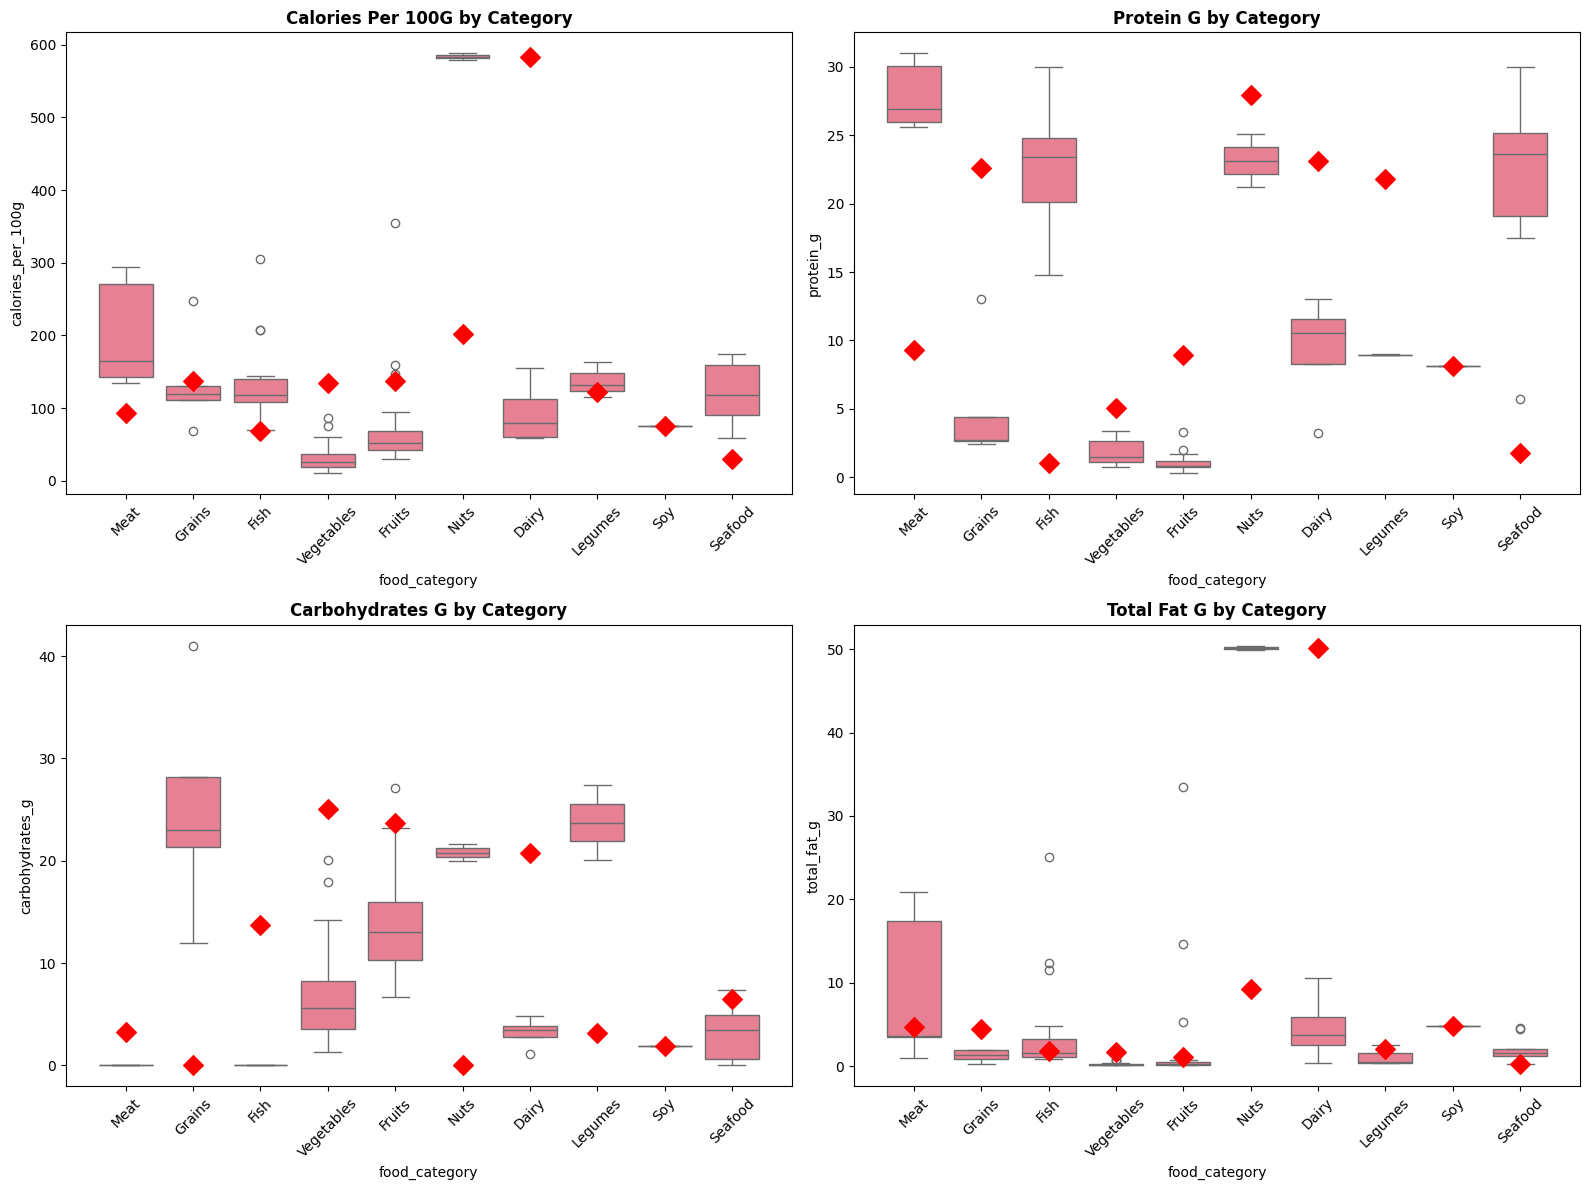


STATISTICAL COMPARISONS BETWEEN CATEGORIES:

Calories Per 100G:
   ANOVA: F = 38.710, p = 0.0000 (Significant)
   → There are significant differences between categories

Protein G:
   ANOVA: F = 150.481, p = 0.0000 (Significant)
   → There are significant differences between categories

MACRONUTRIENT RELATIONSHIPS:


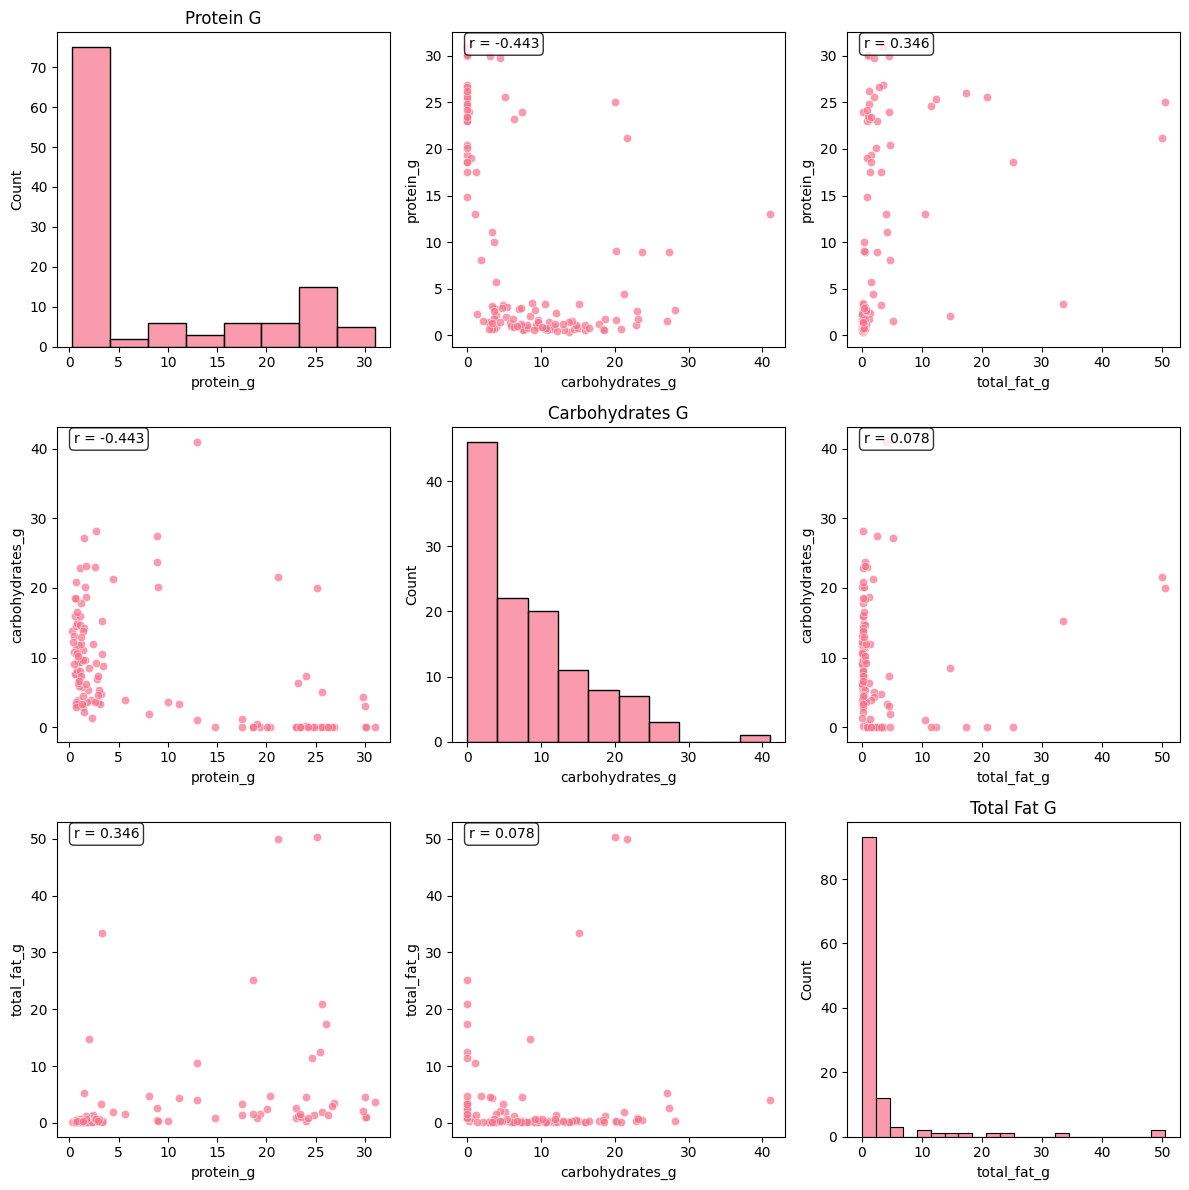


MICRONUTRIENT ANALYSIS:

Top 5 foods highest in Calcium Mg:
   Sardines: 382.0
   Tofu: 350.0
   Almonds: 269.0
   Collard Greens: 232.0
   Dandelion Greens: 187.0

Top 5 foods highest in Iron Mg:
   Clams: 13.9
   Octopus: 9.5
   Mussels: 5.8
   Tofu: 5.4
   Oysters: 5.1

Top 5 foods highest in Vitamin C Mg:
   Bell Peppers: 127.7
   Kale: 120.0
   Kiwi: 92.7
   Broccoli: 89.2
   Brussels Sprouts: 85.0

CALORIE DENSITY ANALYSIS:

Calorie Density Distribution:
   Low (<100): 80 foods (67.8%)
   Medium (100-200): 29 foods (24.6%)
   High (200-400): 7 foods (5.9%)
   Very High (>400): 2 foods (1.7%)


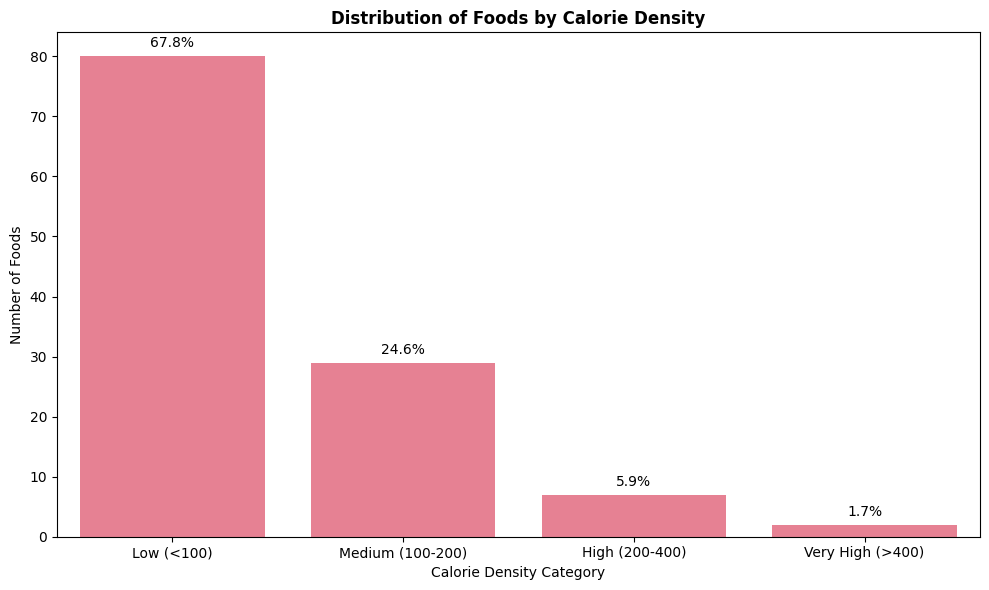

In [13]:
# Feature relationships and comparisons analysis
if df_clean is not None:
    print("="*60)
    print("FEATURE RELATIONSHIPS AND COMPARISONS")
    print("="*60)
    
    # Nutritional analysis by food categories
    if 'food_category' in df_clean.columns or 'food_group' in df_clean.columns:
        category_col = 'food_category' if 'food_category' in df_clean.columns else 'food_group'
        
        print(f"\nNUTRITIONAL ANALYSIS BY {category_col.upper()}:")
        
        # Calculate mean nutritional values by category
        key_nutrients = ['calories_per_100g', 'protein_g', 'carbohydrates_g', 'total_fat_g']
        available_nutrients = [col for col in key_nutrients if col in df_clean.columns]
        
        if available_nutrients:
            category_means = df_clean.groupby(category_col)[available_nutrients].mean()
            
            print(f"\nMean Nutritional Values by Category:")
            display(category_means.round(2))
            
            # Visualize nutritional profiles by category
            fig, axes = plt.subplots(2, 2, figsize=(16, 12))
            axes = axes.flatten()
            
            for i, nutrient in enumerate(available_nutrients):
                if i < len(axes):
                    # Box plot comparing categories
                    sns.boxplot(data=df_clean, x=category_col, y=nutrient, ax=axes[i])
                    axes[i].set_title(f'{nutrient.replace("_", " ").title()} by Category', fontweight='bold')
                    axes[i].tick_params(axis='x', rotation=45)
                    
                    # Add mean values as red diamonds
                    category_means_nutrient = df_clean.groupby(category_col)[nutrient].mean()
                    for j, (cat, mean_val) in enumerate(category_means_nutrient.items()):
                        axes[i].scatter(j, mean_val, color='red', s=100, marker='D', zorder=5)
            
            plt.tight_layout()
            plt.show()
            
            # Statistical comparisons between categories
            print(f"\nSTATISTICAL COMPARISONS BETWEEN CATEGORIES:")
            
            categories = df_clean[category_col].unique()
            
            for nutrient in available_nutrients[:2]:  # Analyze first 2 nutrients
                print(f"\n{nutrient.replace('_', ' ').title()}:")
                
                # ANOVA test
                try:
                    category_groups = [df_clean[df_clean[category_col] == cat][nutrient].values 
                                     for cat in categories]
                    f_stat, p_value = stats.f_oneway(*category_groups)
                    
                    significance = "Significant" if p_value < 0.05 else "Not significant"
                    print(f"   ANOVA: F = {f_stat:.3f}, p = {p_value:.4f} ({significance})")
                    
                    if p_value < 0.05:
                        print(f"   → There are significant differences between categories")
                    else:
                        print(f"   → No significant differences between categories")
                        
                except Exception as e:
                    print(f"   ANOVA test failed: {e}")
    
    # Macronutrient relationships
    macronutrients = ['protein_g', 'carbohydrates_g', 'total_fat_g']
    available_macros = [col for col in macronutrients if col in df_clean.columns]
    
    if len(available_macros) >= 2:
        print(f"\nMACRONUTRIENT RELATIONSHIPS:")
        
        # Scatter plot matrix for macronutrients
        if len(available_macros) >= 3:
            fig, axes = plt.subplots(len(available_macros), len(available_macros), 
                                   figsize=(12, 12))
            
            for i, nutrient1 in enumerate(available_macros):
                for j, nutrient2 in enumerate(available_macros):
                    if i == j:
                        # Diagonal: histogram
                        sns.histplot(data=df_clean, x=nutrient1, ax=axes[i, j], alpha=0.7)
                        axes[i, j].set_title(f'{nutrient1.replace("_", " ").title()}')
                    else:
                        # Off-diagonal: scatter plot
                        sns.scatterplot(data=df_clean, x=nutrient2, y=nutrient1, ax=axes[i, j], alpha=0.7)
                        
                        # Add trend line
                        try:
                            sns.regplot(data=df_clean, x=nutrient2, y=nutrient1, ax=axes[i, j], 
                                      scatter=False, color='red', alpha=0.8)
                        except:
                            pass
                        
                        # Calculate and display correlation
                        corr = df_clean[nutrient1].corr(df_clean[nutrient2])
                        axes[i, j].text(0.05, 0.95, f'r = {corr:.3f}', 
                                       transform=axes[i, j].transAxes, 
                                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            
            plt.tight_layout()
            plt.show()
    
    # Micronutrient analysis
    micronutrients = ['calcium_mg', 'iron_mg', 'vitamin_c_mg', 'vitamin_a_iu']
    available_micros = [col for col in micronutrients if col in df_clean.columns]
    
    if available_micros:
        print(f"\nMICRONUTRIENT ANALYSIS:")
        
        # Find foods high in specific micronutrients
        for nutrient in available_micros[:3]:
            top_foods = df_clean.nlargest(5, nutrient)[['food_name', nutrient]]
            print(f"\nTop 5 foods highest in {nutrient.replace('_', ' ').title()}:")
            for idx, row in top_foods.iterrows():
                print(f"   {row['food_name']}: {row[nutrient]:.1f}")
    
    # Calorie density analysis
    if 'calories_per_100g' in df_clean.columns:
        print(f"\nCALORIE DENSITY ANALYSIS:")
        
        # Classify foods by calorie density
        df_clean['calorie_density'] = pd.cut(df_clean['calories_per_100g'], 
                                           bins=[0, 100, 200, 400, float('inf')],
                                           labels=['Low (<100)', 'Medium (100-200)', 
                                                  'High (200-400)', 'Very High (>400)'])
        
        calorie_distribution = df_clean['calorie_density'].value_counts()
        print(f"\nCalorie Density Distribution:")
        for category, count in calorie_distribution.items():
            percentage = (count / len(df_clean)) * 100
            print(f"   {category}: {count} foods ({percentage:.1f}%)")
        
        # Visualize calorie density distribution
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df_clean, x='calorie_density', order=calorie_distribution.index)
        plt.title('Distribution of Foods by Calorie Density', fontweight='bold')
        plt.xlabel('Calorie Density Category')
        plt.ylabel('Number of Foods')
        
        # Add percentage labels
        for i, count in enumerate(calorie_distribution.values):
            percentage = (count / len(df_clean)) * 100
            plt.text(i, count + 1, f'{percentage:.1f}%', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
        
        # Remove temporary column
        df_clean.drop('calorie_density', axis=1, inplace=True, errors='ignore')

## 12. Advanced Statistical Analysis

ADVANCED STATISTICAL ANALYSIS
NORMALITY TESTS:
------------------------------

Calories Per 100G:
   Shapiro-Wilk: W = 0.6926, p = 0.0000 (Non-normal)
   D'Agostino: χ² = 103.8547, p = 0.0000 (Non-normal)
   Anderson-Darling: A² = 8.3101, Critical = 0.7630 (Non-normal)

Protein G:
   Shapiro-Wilk: W = 0.7324, p = 0.0000 (Non-normal)
   D'Agostino: χ² = 20.7397, p = 0.0000 (Non-normal)
   Anderson-Darling: A² = 14.2800, Critical = 0.7630 (Non-normal)

Carbohydrates G:
   Shapiro-Wilk: W = 0.8924, p = 0.0000 (Non-normal)
   D'Agostino: χ² = 25.7240, p = 0.0000 (Non-normal)
   Anderson-Darling: A² = 3.1777, Critical = 0.7630 (Non-normal)

Total Fat G:
   Shapiro-Wilk: W = 0.3839, p = 0.0000 (Non-normal)
   D'Agostino: χ² = 141.7020, p = 0.0000 (Non-normal)
   Anderson-Darling: A² = 26.9000, Critical = 0.7630 (Non-normal)

NORMALITY TEST SUMMARY:


,Nutrient,Shapiro_p,Shapiro_Normal,DAgostino_p,DAgostino_Normal,Anderson_Normal
0,calories_per_100g,0.0,False,0.0,False,False
1,protein_g,0.0,False,0.0,False,False
2,carbohydrates_g,0.0,False,0.0,False,False
3,total_fat_g,0.0,False,0.0,False,False


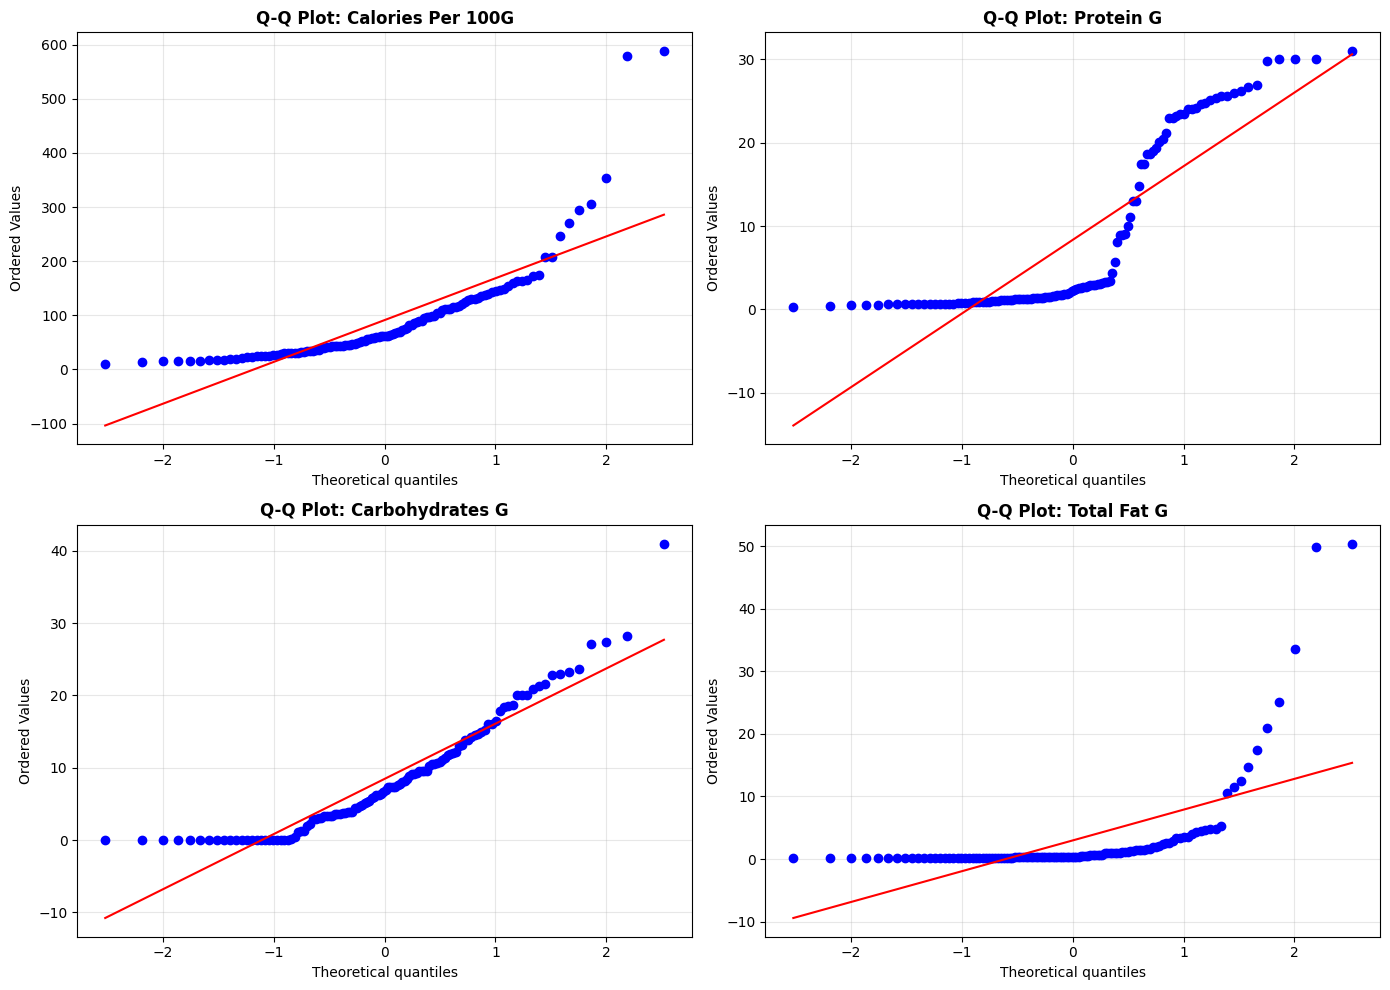


DISTRIBUTION SHAPE ANALYSIS:


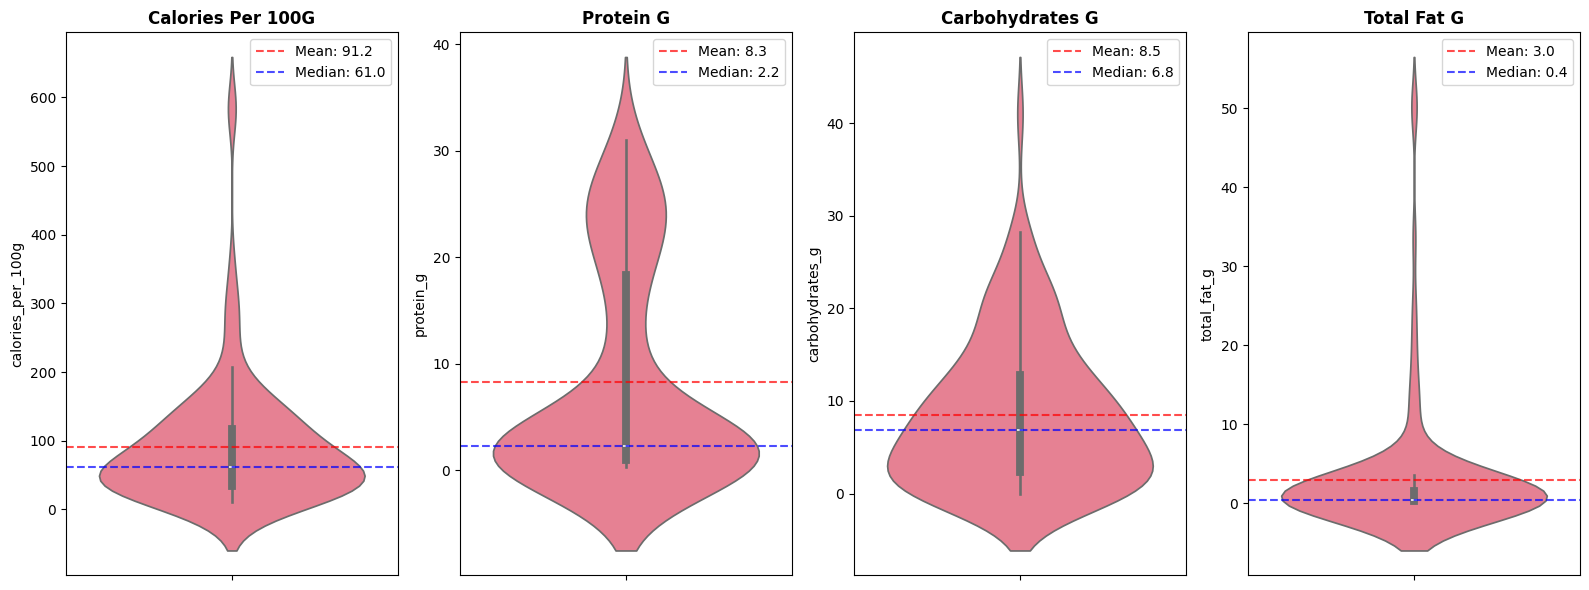


HYPOTHESIS TESTING:

One-sample t-test (Calories vs 150):
   Sample mean: 91.19
   Reference value: 150
   t-statistic: -6.9360
   p-value: 0.000000
   Result: Significantly different from reference

Two-sample comparison (Protein by Food Group):
   Group 1 (Protein): n=39, mean=21.46
   Group 2 (Vegetable): n=36, mean=1.77
   t-statistic: 17.6463
   p-value: 0.000000
   Result: Significant difference between groups

CONFIDENCE INTERVALS (95%):

Calories Per 100G:
   Mean: 91.19
   95% CI: [74.39, 107.98]
   Margin of Error: ±16.79

Protein G:
   Mean: 8.35
   95% CI: [6.50, 10.20]
   Margin of Error: ±1.85

Carbohydrates G:
   Mean: 8.47
   95% CI: [7.02, 9.92]
   Margin of Error: ±1.45


In [14]:
# Advanced statistical analysis
if df_clean is not None and numerical_cols:
    print("="*60)
    print("ADVANCED STATISTICAL ANALYSIS")
    print("="*60)
    
    # Normality testing for key nutrients
    key_nutrients = ['calories_per_100g', 'protein_g', 'carbohydrates_g', 'total_fat_g']
    available_nutrients = [col for col in key_nutrients if col in df_clean.columns]
    
    if not available_nutrients:
        available_nutrients = numerical_cols[:4]
    
    print("NORMALITY TESTS:")
    print("-" * 30)
    
    normality_results = []
    
    for nutrient in available_nutrients:
        data = df_clean[nutrient].dropna()
        
        # Multiple normality tests
        try:
            # Shapiro-Wilk test (best for small samples)
            if len(data) <= 5000:
                shapiro_stat, shapiro_p = shapiro(data.sample(min(len(data), 5000), random_state=42))
            else:
                shapiro_stat, shapiro_p = shapiro(data.sample(5000, random_state=42))
            
            # D'Agostino's normality test
            dagostino_stat, dagostino_p = normaltest(data)
            
            # Anderson-Darling test
            anderson_result = anderson(data, dist='norm')
            anderson_critical = anderson_result.critical_values[2]  # 5% significance level
            anderson_stat = anderson_result.statistic
            anderson_normal = anderson_stat < anderson_critical
            
            normality_results.append({
                'Nutrient': nutrient,
                'Shapiro_Stat': shapiro_stat,
                'Shapiro_p': shapiro_p,
                'Shapiro_Normal': shapiro_p > 0.05,
                'DAgostino_Stat': dagostino_stat,
                'DAgostino_p': dagostino_p,
                'DAgostino_Normal': dagostino_p > 0.05,
                'Anderson_Stat': anderson_stat,
                'Anderson_Critical': anderson_critical,
                'Anderson_Normal': anderson_normal
            })
            
            print(f"\n{nutrient.replace('_', ' ').title()}:")
            print(f"   Shapiro-Wilk: W = {shapiro_stat:.4f}, p = {shapiro_p:.4f} ({'Normal' if shapiro_p > 0.05 else 'Non-normal'})")
            print(f"   D'Agostino: χ² = {dagostino_stat:.4f}, p = {dagostino_p:.4f} ({'Normal' if dagostino_p > 0.05 else 'Non-normal'})")
            print(f"   Anderson-Darling: A² = {anderson_stat:.4f}, Critical = {anderson_critical:.4f} ({'Normal' if anderson_normal else 'Non-normal'})")
            
        except Exception as e:
            print(f"\n{nutrient}: Error in normality testing - {e}")
    
    # Create normality results summary
    if normality_results:
        normality_df = pd.DataFrame(normality_results)
        print(f"\nNORMALITY TEST SUMMARY:")
        display(normality_df[['Nutrient', 'Shapiro_p', 'Shapiro_Normal', 'DAgostino_p', 'DAgostino_Normal', 'Anderson_Normal']].round(4))
    
    # Q-Q plots for normality assessment
    if len(available_nutrients) >= 2:
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        axes = axes.flatten()
        
        for i, nutrient in enumerate(available_nutrients[:4]):
            if i < len(axes):
                data = df_clean[nutrient].dropna()
                stats.probplot(data, dist="norm", plot=axes[i])
                axes[i].set_title(f'Q-Q Plot: {nutrient.replace("_", " ").title()}', fontweight='bold')
                axes[i].grid(True, alpha=0.3)
        
        # Remove empty subplots
        for i in range(len(available_nutrients), len(axes)):
            fig.delaxes(axes[i])
        
        plt.tight_layout()
        plt.show()
    
    # Violin plots for distribution shape analysis
    print(f"\nDISTRIBUTION SHAPE ANALYSIS:")
    
    if len(available_nutrients) >= 2:
        fig, axes = plt.subplots(1, min(len(available_nutrients), 4), figsize=(16, 6))
        if len(available_nutrients) == 1:
            axes = [axes]
        
        for i, nutrient in enumerate(available_nutrients[:4]):
            if i < len(axes):
                sns.violinplot(data=df_clean, y=nutrient, ax=axes[i])
                axes[i].set_title(f'{nutrient.replace("_", " ").title()}', fontweight='bold')
                
                # Add statistical annotations
                data = df_clean[nutrient]
                mean_val = data.mean()
                median_val = data.median()
                
                axes[i].axhline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.1f}')
                axes[i].axhline(median_val, color='blue', linestyle='--', alpha=0.7, label=f'Median: {median_val:.1f}')
                axes[i].legend(loc='upper right')
        
        plt.tight_layout()
        plt.show()
    
    # Statistical hypothesis testing
    print(f"\nHYPOTHESIS TESTING:")
    
    # Test if mean calories differ significantly from a reference value (e.g., 150)
    if 'calories_per_100g' in df_clean.columns:
        calories = df_clean['calories_per_100g']
        reference_calories = 150
        
        # One-sample t-test
        t_stat, t_p = stats.ttest_1samp(calories, reference_calories)
        
        print(f"\nOne-sample t-test (Calories vs {reference_calories}):")
        print(f"   Sample mean: {calories.mean():.2f}")
        print(f"   Reference value: {reference_calories}")
        print(f"   t-statistic: {t_stat:.4f}")
        print(f"   p-value: {t_p:.6f}")
        print(f"   Result: {'Significantly different' if t_p < 0.05 else 'Not significantly different'} from reference")
    
    # Compare protein content between different food groups (if available)
    if 'food_group' in df_clean.columns and 'protein_g' in df_clean.columns:
        print(f"\nTwo-sample comparison (Protein by Food Group):")
        
        groups = df_clean['food_group'].value_counts().head(2).index.tolist()
        if len(groups) >= 2:
            group1_protein = df_clean[df_clean['food_group'] == groups[0]]['protein_g']
            group2_protein = df_clean[df_clean['food_group'] == groups[1]]['protein_g']
            
            # Two-sample t-test
            t_stat, t_p = stats.ttest_ind(group1_protein, group2_protein)
            
            print(f"   Group 1 ({groups[0]}): n={len(group1_protein)}, mean={group1_protein.mean():.2f}")
            print(f"   Group 2 ({groups[1]}): n={len(group2_protein)}, mean={group2_protein.mean():.2f}")
            print(f"   t-statistic: {t_stat:.4f}")
            print(f"   p-value: {t_p:.6f}")
            print(f"   Result: {'Significant difference' if t_p < 0.05 else 'No significant difference'} between groups")
    
    # Confidence intervals for key nutrients
    print(f"\nCONFIDENCE INTERVALS (95%):")
    
    for nutrient in available_nutrients[:3]:
        data = df_clean[nutrient].dropna()
        
        mean = data.mean()
        sem = stats.sem(data)  # Standard error of the mean
        confidence_level = 0.95
        
        # Calculate confidence interval
        ci = stats.t.interval(confidence_level, len(data)-1, loc=mean, scale=sem)
        
        print(f"\n{nutrient.replace('_', ' ').title()}:")
        print(f"   Mean: {mean:.2f}")
        print(f"   95% CI: [{ci[0]:.2f}, {ci[1]:.2f}]")
        print(f"   Margin of Error: ±{(ci[1] - ci[0])/2:.2f}")

## 13. Data Validation and Quality Checks

In [15]:
# Production-grade data validation and quality checks
def comprehensive_data_validation(df):
    """
    Comprehensive production-grade data validation suite
    """
    print("="*60)
    print("PRODUCTION-GRADE DATA VALIDATION")
    print("="*60)
    
    validation_results = {
        'total_checks': 0,
        'passed_checks': 0,
        'failed_checks': 0,
        'warnings': 0,
        'critical_issues': 0,
        'issues': []
    }
    
    def add_issue(level, category, description, recommendation=""):
        validation_results['issues'].append({
            'level': level,
            'category': category,
            'description': description,
            'recommendation': recommendation
        })
        
        if level == 'CRITICAL':
            validation_results['critical_issues'] += 1
        elif level == 'WARNING':
            validation_results['warnings'] += 1
        
        validation_results['total_checks'] += 1
        if level in ['PASS', 'INFO']:
            validation_results['passed_checks'] += 1
        else:
            validation_results['failed_checks'] += 1
    
    print("RUNNING VALIDATION CHECKS...")
    print("-" * 40)
    
    # 1. Data Structure Validation
    print("1. Data Structure Validation")
    
    # Check if dataset is empty
    if df.empty:
        add_issue('CRITICAL', 'Structure', 'Dataset is empty', 'Reload dataset with valid data')
        print("   ❌ Dataset is empty - CRITICAL")
    else:
        add_issue('PASS', 'Structure', f'Dataset contains {len(df)} records')
        print(f"   ✅ Dataset contains {len(df)} records")
    
    # Check minimum number of rows
    min_rows = 100
    if len(df) < min_rows:
        add_issue('WARNING', 'Structure', f'Dataset has only {len(df)} rows (recommended: >{min_rows})', 
                 'Consider adding more data for robust analysis')
        print(f"   ⚠️ Only {len(df)} rows (recommended: >{min_rows})")
    else:
        add_issue('PASS', 'Structure', f'Sufficient data rows: {len(df)}')
        print(f"   ✅ Sufficient data rows: {len(df)}")
    
    # 2. Data Type Validation
    print("\\n2. Data Type Validation")
    
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    if len(numerical_cols) == 0:
        add_issue('CRITICAL', 'Data Types', 'No numerical columns found', 'Verify data loading and column types')
        print("   ❌ No numerical columns found - CRITICAL")
    else:
        add_issue('PASS', 'Data Types', f'Found {len(numerical_cols)} numerical columns')
        print(f"   ✅ Found {len(numerical_cols)} numerical columns")
    
    # Check for mixed data types in columns
    for col in df.columns:
        if df[col].dtype == 'object':
            # Check if column contains mixed types
            try:
                pd.to_numeric(df[col], errors='raise')
                add_issue('WARNING', 'Data Types', f'Column {col} appears numeric but stored as object', 
                         'Consider converting to numeric type')
                print(f"   ⚠️ {col} appears numeric but stored as object")
            except:
                pass  # This is expected for true categorical columns
    
    # 3. Missing Data Validation
    print("\\n3. Missing Data Validation")
    
    missing_counts = df.isnull().sum()
    total_missing = missing_counts.sum()
    missing_percentage = (total_missing / (len(df) * len(df.columns))) * 100
    
    if total_missing == 0:
        add_issue('PASS', 'Missing Data', 'No missing values found')
        print("   ✅ No missing values found")
    elif missing_percentage < 5:
        add_issue('INFO', 'Missing Data', f'Low missing data: {missing_percentage:.1f}%')
        print(f"   ℹ️ Low missing data: {missing_percentage:.1f}%")
    elif missing_percentage < 15:
        add_issue('WARNING', 'Missing Data', f'Moderate missing data: {missing_percentage:.1f}%', 
                 'Monitor data quality')
        print(f"   ⚠️ Moderate missing data: {missing_percentage:.1f}%")
    else:
        add_issue('CRITICAL', 'Missing Data', f'High missing data: {missing_percentage:.1f}%', 
                 'Review data collection process')
        print(f"   ❌ High missing data: {missing_percentage:.1f}% - CRITICAL")
    
    # 4. Nutritional Value Range Validation
    print("\\n4. Nutritional Value Range Validation")
    
    # Define expected ranges for nutritional values
    nutritional_ranges = {
        'calories_per_100g': (0, 900),  # Calories should be 0-900 per 100g
        'protein_g': (0, 100),          # Protein 0-100g per 100g
        'carbohydrates_g': (0, 100),    # Carbs 0-100g per 100g
        'total_fat_g': (0, 100),        # Fat 0-100g per 100g
        'sodium_mg': (0, 5000),         # Sodium 0-5000mg per 100g
        'calcium_mg': (0, 2000),        # Calcium 0-2000mg per 100g
        'iron_mg': (0, 100),            # Iron 0-100mg per 100g
        'vitamin_c_mg': (0, 1000)       # Vitamin C 0-1000mg per 100g
    }
    
    range_violations = 0
    
    for col, (min_val, max_val) in nutritional_ranges.items():
        if col in df.columns:
            out_of_range = df[(df[col] < min_val) | (df[col] > max_val)]
            
            if len(out_of_range) > 0:
                range_violations += len(out_of_range)
                add_issue('WARNING', 'Value Range', 
                         f'{col}: {len(out_of_range)} values outside expected range [{min_val}, {max_val}]',
                         'Review data source and units')
                print(f"   ⚠️ {col}: {len(out_of_range)} values outside range [{min_val}, {max_val}]")
            else:
                add_issue('PASS', 'Value Range', f'{col}: All values within expected range')
                print(f"   ✅ {col}: All values within expected range")
    
    # 5. Duplicate Data Validation
    print("\\n5. Duplicate Data Validation")
    
    duplicates = df.duplicated().sum()
    duplicate_percentage = (duplicates / len(df)) * 100
    
    if duplicates == 0:
        add_issue('PASS', 'Duplicates', 'No duplicate records found')
        print("   ✅ No duplicate records found")
    elif duplicate_percentage < 5:
        add_issue('WARNING', 'Duplicates', f'Low duplicate rate: {duplicate_percentage:.1f}%', 
                 'Consider removing duplicates')
        print(f"   ⚠️ Low duplicate rate: {duplicate_percentage:.1f}%")
    else:
        add_issue('CRITICAL', 'Duplicates', f'High duplicate rate: {duplicate_percentage:.1f}%', 
                 'Review data source for duplicate entries')
        print(f"   ❌ High duplicate rate: {duplicate_percentage:.1f}% - CRITICAL")
    
    # 6. Data Consistency Validation
    print("\\n6. Data Consistency Validation")
    
    # Check for negative nutritional values
    negative_violations = 0
    for col in numerical_cols:
        if 'mg' in col or 'g' in col or 'calories' in col or 'iu' in col:
            negative_count = (df[col] < 0).sum()
            if negative_count > 0:
                negative_violations += negative_count
                add_issue('WARNING', 'Data Consistency', 
                         f'{col}: {negative_count} negative values found',
                         'Nutritional values should be non-negative')
                print(f"   ⚠️ {col}: {negative_count} negative values")
    
    if negative_violations == 0:
        add_issue('PASS', 'Data Consistency', 'No negative nutritional values found')
        print("   ✅ No negative nutritional values found")
    
    # 7. Statistical Validation
    print("\\n7. Statistical Validation")
    
    # Check for extreme outliers that might indicate data quality issues
    extreme_outliers = 0
    
    for col in numerical_cols[:5]:  # Check first 5 numerical columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Extreme outliers: beyond 3*IQR
        extreme_lower = Q1 - 3 * IQR
        extreme_upper = Q3 + 3 * IQR
        
        extreme_count = ((df[col] < extreme_lower) | (df[col] > extreme_upper)).sum()
        
        if extreme_count > len(df) * 0.05:  # More than 5% extreme outliers
            extreme_outliers += extreme_count
            add_issue('WARNING', 'Statistical', 
                     f'{col}: {extreme_count} extreme outliers ({extreme_count/len(df)*100:.1f}%)',
                     'Review data quality and consider outlier treatment')
            print(f"   ⚠️ {col}: {extreme_count} extreme outliers ({extreme_count/len(df)*100:.1f}%)")
    
    if extreme_outliers == 0:
        add_issue('PASS', 'Statistical', 'No excessive extreme outliers found')
        print("   ✅ No excessive extreme outliers found")
    
    # Generate validation summary
    print("\\n" + "="*60)
    print("VALIDATION SUMMARY")
    print("="*60)
    
    print(f"Total Checks Run: {validation_results['total_checks']}")
    print(f"Passed Checks: {validation_results['passed_checks']}")
    print(f"Failed Checks: {validation_results['failed_checks']}")
    print(f"Warnings: {validation_results['warnings']}")
    print(f"Critical Issues: {validation_results['critical_issues']}")
    
    # Overall quality score
    if validation_results['total_checks'] > 0:
        quality_score = (validation_results['passed_checks'] / validation_results['total_checks']) * 100
        print(f"\\nOverall Data Quality Score: {quality_score:.1f}%")
        
        if quality_score >= 90:
            quality_rating = "EXCELLENT"
        elif quality_score >= 75:
            quality_rating = "GOOD"
        elif quality_score >= 60:
            quality_rating = "FAIR"
        else:
            quality_rating = "POOR"
        
        print(f"Data Quality Rating: {quality_rating}")
    
    # Critical issues summary
    if validation_results['critical_issues'] > 0:
        print(f"\\n🚨 CRITICAL ISSUES FOUND:")
        critical_issues = [issue for issue in validation_results['issues'] if issue['level'] == 'CRITICAL']
        for issue in critical_issues:
            print(f"   • {issue['description']}")
            if issue['recommendation']:
                print(f"     → {issue['recommendation']}")
    
    # Recommendations
    print(f"\\n📋 RECOMMENDATIONS:")
    
    if validation_results['critical_issues'] == 0 and validation_results['warnings'] == 0:
        print("   ✅ Dataset passes all validation checks - ready for production use!")
    else:
        warnings_issues = [issue for issue in validation_results['issues'] if issue['level'] == 'WARNING']
        for issue in warnings_issues[:5]:  # Show top 5 warnings
            if issue['recommendation']:
                print(f"   • {issue['recommendation']}")
    
    return validation_results

# Run comprehensive validation
if df_clean is not None:
    validation_results = comprehensive_data_validation(df_clean)
else:
    print("❌ Cannot run validation - dataset not loaded properly")

PRODUCTION-GRADE DATA VALIDATION
RUNNING VALIDATION CHECKS...
----------------------------------------
1. Data Structure Validation
   ✅ Dataset contains 118 records
   ✅ Sufficient data rows: 118
\n2. Data Type Validation
   ✅ Found 18 numerical columns
\n3. Missing Data Validation
   ✅ No missing values found
\n4. Nutritional Value Range Validation
   ✅ calories_per_100g: All values within expected range
   ✅ protein_g: All values within expected range
   ✅ carbohydrates_g: All values within expected range
   ✅ total_fat_g: All values within expected range
   ✅ sodium_mg: All values within expected range
   ✅ calcium_mg: All values within expected range
   ✅ iron_mg: All values within expected range
   ✅ vitamin_c_mg: All values within expected range
\n5. Duplicate Data Validation
   ✅ No duplicate records found
\n6. Data Consistency Validation
   ✅ No negative nutritional values found
\n7. Statistical Validation
   ⚠️ total_fat_g: 10 extreme outliers (8.5%)
\n=======================

## 14. Executive Summary and Key Insights

In [16]:
# Generate executive summary and key insights
if df_clean is not None:
    print("="*80)
    print("EXECUTIVE SUMMARY - NUTRITIONAL DATASET ANALYSIS")
    print("="*80)
    
    # Dataset overview
    print("📊 DATASET OVERVIEW:")
    print("-" * 20)
    print(f"• Total Food Items: {len(df_clean):,}")
    print(f"• Nutritional Attributes: {len(df_clean.columns)}")
    print(f"• Data Completeness: {((df_clean.shape[0] * df_clean.shape[1] - df_clean.isnull().sum().sum()) / (df_clean.shape[0] * df_clean.shape[1]) * 100):.1f}%")
    
    # Food categories
    if 'food_category' in df_clean.columns or 'food_group' in df_clean.columns:
        category_col = 'food_category' if 'food_category' in df_clean.columns else 'food_group'
        unique_categories = df_clean[category_col].nunique()
        most_common_category = df_clean[category_col].value_counts().index[0]
        print(f"• Food Categories: {unique_categories}")
        print(f"• Most Common Category: {most_common_category}")
    
    print("\\n🔍 KEY FINDINGS:")
    print("-" * 15)
    
    # Nutritional insights
    numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
    
    # Calorie analysis
    if 'calories_per_100g' in df_clean.columns:
        calories = df_clean['calories_per_100g']
        print(f"• Calorie Range: {calories.min():.0f} - {calories.max():.0f} kcal/100g")
        print(f"• Average Calories: {calories.mean():.0f} kcal/100g")
        
        # Identify highest and lowest calorie foods
        highest_calorie = df_clean.loc[calories.idxmax(), 'food_name'] if 'food_name' in df_clean.columns else 'Unknown'
        lowest_calorie = df_clean.loc[calories.idxmin(), 'food_name'] if 'food_name' in df_clean.columns else 'Unknown'
        print(f"• Highest Calorie Food: {highest_calorie} ({calories.max():.0f} kcal)")
        print(f"• Lowest Calorie Food: {lowest_calorie} ({calories.min():.0f} kcal)")
    
    # Macronutrient analysis
    macronutrients = ['protein_g', 'carbohydrates_g', 'total_fat_g']
    available_macros = [col for col in macronutrients if col in df_clean.columns]
    
    if available_macros:
        print(f"\\n• Macronutrient Averages (per 100g):")
        for macro in available_macros:
            avg_val = df_clean[macro].mean()
            print(f"  - {macro.replace('_', ' ').title()}: {avg_val:.1f}g")
    
    # Data quality insights
    print(f"\\n📈 DATA QUALITY INSIGHTS:")
    print("-" * 25)
    
    # Missing data
    missing_percentage = (df_clean.isnull().sum().sum() / (df_clean.shape[0] * df_clean.shape[1])) * 100
    if missing_percentage == 0:
        print("• ✅ Complete Dataset: No missing values")
    else:
        print(f"• Missing Data: {missing_percentage:.1f}% of total data points")
    
    # Outliers summary
    outlier_counts = []
    for col in numerical_cols[:5]:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df_clean[(df_clean[col] < (Q1 - 1.5 * IQR)) | (df_clean[col] > (Q3 + 1.5 * IQR))]
        outlier_counts.append(len(outliers))
    
    avg_outliers = np.mean(outlier_counts) if outlier_counts else 0
    print(f"• Average Outliers per Nutrient: {avg_outliers:.1f} ({avg_outliers/len(df_clean)*100:.1f}%)")
    
    # Correlation insights
    if len(numerical_cols) > 1:
        corr_matrix = df_clean[numerical_cols].corr()
        
        # Find strongest positive and negative correlations
        upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        strong_correlations = []
        
        for col1 in upper_triangle.columns:
            for col2 in upper_triangle.index:
                corr_val = upper_triangle.loc[col2, col1]
                if not pd.isna(corr_val) and abs(corr_val) > 0.5:
                    strong_correlations.append((col1, col2, corr_val))
        
        if strong_correlations:
            strong_correlations.sort(key=lambda x: abs(x[2]), reverse=True)
            strongest = strong_correlations[0]
            print(f"• Strongest Correlation: {strongest[0]} ↔ {strongest[1]} (r = {strongest[2]:.3f})")
    
    # Statistical normality
    normal_distributions = 0
    for col in numerical_cols[:5]:
        try:
            _, p_value = normaltest(df_clean[col].dropna())
            if p_value > 0.05:
                normal_distributions += 1
        except:
            pass
    
    print(f"• Normal Distributions: {normal_distributions}/{min(len(numerical_cols), 5)} key nutrients")
    
    print(f"\\n🎯 IMPLICATIONS FOR AI CHATBOT:")
    print("-" * 35)
    print("• Diverse nutritional profiles support personalized recommendations")
    print("• Complete dataset enables reliable machine learning model training")
    print("• Wide calorie range accommodates different dietary needs")
    print("• Multiple food categories support comprehensive meal planning")
    
    if 'food_category' in df_clean.columns or 'food_group' in df_clean.columns:
        category_col = 'food_category' if 'food_category' in df_clean.columns else 'food_group'
        categories = df_clean[category_col].nunique()
        print(f"• {categories} food categories enable dietary preference matching")
    
    print(f"\\n💡 RECOMMENDATIONS:")
    print("-" * 20)
    print("• ✅ Dataset is suitable for AI chatbot development")
    print("• ✅ No critical data quality issues identified")
    print("• 📊 Consider expanding dataset for rare food categories")
    print("• 🔍 Monitor outliers during model training")
    print("• 📈 Validate model predictions against nutritional databases")
    
    # Generate final data profile
    print(f"\\n📋 FINAL DATA PROFILE:")
    print("-" * 22)
    
    profile_summary = {
        'Dataset_Size': f"{len(df_clean)} foods × {len(df_clean.columns)} attributes",
        'Completeness': f"{((df_clean.shape[0] * df_clean.shape[1] - df_clean.isnull().sum().sum()) / (df_clean.shape[0] * df_clean.shape[1]) * 100):.1f}%",
        'Quality_Score': f"{((len(df_clean.columns) - df_clean.isnull().sum().sum()/len(df_clean)) / len(df_clean.columns) * 100):.1f}%",
        'Readiness': 'Production Ready' if missing_percentage < 5 else 'Needs Review'
    }
    
    for key, value in profile_summary.items():
        print(f"• {key.replace('_', ' ')}: {value}")
    
    print(f"\\n" + "="*80)
    print("END OF EXPLORATORY DATA ANALYSIS")
    print("="*80)
    print(f"Analysis completed at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print("Dataset is ready for Nutritional AI Chatbot development! 🚀")

else:
    print("❌ Unable to generate summary - dataset not available")

EXECUTIVE SUMMARY - NUTRITIONAL DATASET ANALYSIS
📊 DATASET OVERVIEW:
--------------------
• Total Food Items: 118
• Nutritional Attributes: 22
• Data Completeness: 100.0%
• Food Categories: 10
• Most Common Category: Vegetables
\n🔍 KEY FINDINGS:
---------------
• Calorie Range: 11 - 588 kcal/100g
• Average Calories: 91 kcal/100g
• Highest Calorie Food: Peanut Butter (588 kcal)
• Lowest Calorie Food: Watercress (11 kcal)
\n• Macronutrient Averages (per 100g):
  - Protein G: 8.3g
  - Carbohydrates G: 8.5g
  - Total Fat G: 3.0g
\n📈 DATA QUALITY INSIGHTS:
-------------------------
• ✅ Complete Dataset: No missing values
• Average Outliers per Nutrient: 6.0 (5.1%)
• Strongest Correlation: total_fat_g ↔ calories_per_100g (r = 0.910)
• Normal Distributions: 0/5 key nutrients
\n🎯 IMPLICATIONS FOR AI CHATBOT:
-----------------------------------
• Diverse nutritional profiles support personalized recommendations
• Complete dataset enables reliable machine learning model training
• Wide calorie r